# **PROBLEMA DE NEGOCIO**


---




La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

# **1. Configuración del Ambiente**


---




In [142]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Preprocesamiento de Datos**


---


In [143]:
## Importar el df, para analizar como se importa la informaciòn
df = pd.read_csv('database/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
df.sample(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
5213,Direct,20170131,"{""browser"": ""Opera Mini"", ""browserVersion"": ""n...",5465442900083292350,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",5465442900083292350_1485855615,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1485855615,1,1485855615
8765,Organic Search,20161011,"{""browser"": ""Internet Explorer"", ""browserVersi...",4483677120546242586,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",4483677120546242586_1476195112,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1476195112,1,1476195112
1443,Organic Search,20170213,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",338040090403591052,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",338040090403591052_1486981226,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1486981226,1,1486981226
11780,Direct,20160908,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7260282306575027367,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",7260282306575027367_1473358647,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1473358647,1,1473358651
7354,Organic Search,20170726,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1097387180946479441,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1097387180946479441_1501085348,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1501085348,1,1501085348


In [144]:
# Identificar el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  object
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  object
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [145]:
df_traffic = df.copy()

In [146]:
# Convertimos las cadenas de texto a diccionarios json
columnas_a_cambiar = ['device', 'geoNetwork', 'totals', 'trafficSource']
for columna in columnas_a_cambiar:
    df_traffic[columna] = df_traffic[columna].apply(json.loads)

# Expandimos los diccionarios en columnas separadas y las unimos al df_traffic
for columna in columnas_a_cambiar:
    expander_columnas = pd.json_normalize(df_traffic[columna])
    df_traffic = pd.concat([df_traffic.drop([columna], axis=1), expander_columnas], axis=1)

df_traffic.sample(5)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
4476,Referral,20170216,6618112738804618609,6618112738804618609_1487287397,Not Socially Engaged,1487287397,2,1487287397,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2979,Direct,20170321,4399434138211327094,4399434138211327094_1490157482,Not Socially Engaged,1490157482,1,1490157482,Safari,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5084,Organic Search,20170405,5800208886020528832,5800208886020528832_1491443503,Not Socially Engaged,1491443503,1,1491443503,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1616,Referral,20170421,7794749153342161111,7794749153342161111_1492819229,Not Socially Engaged,1492819229,1,1492819229,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/analytics/web/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1704,Organic Search,20161018,1687498847515773010,1687498847515773010_1476823602,Not Socially Engaged,1476823602,2,1476823602,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channelGrouping                      12283 non-null  object
 1   date                                 12283 non-null  object
 2   fullVisitorId                        12283 non-null  object
 3   sessionId                            12283 non-null  object
 4   socialEngagementType                 12283 non-null  object
 5   visitId                              12283 non-null  object
 6   visitNumber                          12283 non-null  int64 
 7   visitStartTime                       12283 non-null  int64 
 8   browser                              12283 non-null  object
 9   browserVersion                       12283 non-null  object
 10  browserSize                          12283 non-null  object
 11  operatingSystem                      1228

<Axes: >

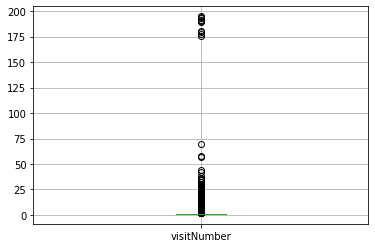

In [148]:
# Identificar Valores unicos
numericals = df_traffic.select_dtypes(include=['int']).columns

df_traffic.boxplot(column=numericals[0])

In [149]:
def show_columns_details(dataframe, columns):
# Iterar sobre cada columna y obtener los valores únicos con su conteo, incluyendo los valores nulos para analizar las variables.
    for columna in columns:
        valores_conteo = dataframe[columna].value_counts(dropna=False, normalize=True)*100
        print(f"...............Valores únicos para la columna '{columna}'..............:\n{valores_conteo}")

In [150]:
show_columns_details(df_traffic, df_traffic.columns)

...............Valores únicos para la columna 'channelGrouping'..............:
channelGrouping
Organic Search    41.968574
Social            24.847350
Direct            16.372222
Referral          11.707238
Paid Search        2.523813
Affiliates         1.921355
Display            0.626883
(Other)            0.032565
Name: proportion, dtype: float64
...............Valores únicos para la columna 'date'..............:
date
20161004    0.569893
20161117    0.561752
20161129    0.545469
20161116    0.545469
20161130    0.529187
              ...   
20170507    0.097696
20161224    0.097696
20161225    0.089555
20170430    0.081413
20170618    0.081413
Name: proportion, Length: 366, dtype: float64
...............Valores únicos para la columna 'fullVisitorId'..............:
fullVisitorId
603373162136570069     0.195392
7660377708313228942    0.195392
5310912563447452038    0.162827
3290805371994597664    0.162827
4376572204985925602    0.154685
                         ...   
791790753290103

We will detect all columns with "Not available in demo dataset" value for drop it

In [151]:
def verify_a_value(dataframe, value, criteria=''):
  useless_columns = []
  for column in dataframe.columns:
    values = dataframe[column].value_counts().index
    if criteria == 'unique':
      condition = (value in values) and (len(values) == 1)
    else:
      condition = (value in values)
    if (condition):
      useless_columns.append(column)

  show_columns_details(dataframe, useless_columns)
  return useless_columns


In [152]:
not_available_columns = verify_a_value(df_traffic, 'not available in demo dataset', 'unique')
print(len(not_available_columns))


...............Valores únicos para la columna 'browserVersion'..............:
browserVersion
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'browserSize'..............:
browserSize
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'operatingSystemVersion'..............:
operatingSystemVersion
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'mobileDeviceBranding'..............:
mobileDeviceBranding
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'mobileDeviceModel'..............:
mobileDeviceModel
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'mobileInputSelector'..............:
mobileInputSelector
not available in demo dataset    100.0
Name:

In [153]:
df_traffic = df_traffic.drop(columns=not_available_columns)

In [154]:
not_available_columns = verify_a_value(df_traffic, 'not available in demo dataset')
len(not_available_columns)

...............Valores únicos para la columna 'region'..............:
region
not available in demo dataset    55.727428
California                       11.959619
New York                          3.215827
(not set)                         2.922739
England                           1.489864
                                   ...    
Perak                             0.008141
Maha Sarakham                     0.008141
Grand Casablanca                  0.008141
Western Cape                      0.008141
Ho Chi Minh City                  0.008141
Name: proportion, Length: 212, dtype: float64
...............Valores únicos para la columna 'metro'..............:
metro
not available in demo dataset             55.727428
(not set)                                 21.973459
San Francisco-Oakland-San Jose CA         10.657006
New York NY                                3.248392
London                                     1.416592
Los Angeles CA                             1.107221
Chicago IL       

3

In [155]:
show_columns_details(df_traffic, df_traffic.columns)

...............Valores únicos para la columna 'channelGrouping'..............:
channelGrouping
Organic Search    41.968574
Social            24.847350
Direct            16.372222
Referral          11.707238
Paid Search        2.523813
Affiliates         1.921355
Display            0.626883
(Other)            0.032565
Name: proportion, dtype: float64
...............Valores únicos para la columna 'date'..............:
date
20161004    0.569893
20161117    0.561752
20161129    0.545469
20161116    0.545469
20161130    0.529187
              ...   
20170507    0.097696
20161224    0.097696
20161225    0.089555
20170430    0.081413
20170618    0.081413
Name: proportion, Length: 366, dtype: float64
...............Valores únicos para la columna 'fullVisitorId'..............:
fullVisitorId
603373162136570069     0.195392
7660377708313228942    0.195392
5310912563447452038    0.162827
3290805371994597664    0.162827
4376572204985925602    0.154685
                         ...   
791790753290103

In [157]:
not_useful_columns = [
  #'socialEngagementType', 
  # 'visits'
  'region', 
  'metro', 
  'city', 
  #'bounces', 
  'keyword', 
  'referralPath', 
  'adwordsClickInfo.page',
  'adwordsClickInfo.slot',
  'adwordsClickInfo.gclId',
  'adwordsClickInfo.adNetworkType',
  'adwordsClickInfo.isVideoAd',
  #'adContent',
  'campaignCode', 'sessionId','visitId', 'networkDomain', 'continent', 'subContinent']

# 'visits': Este valor es 1 para las sesiones con eventos de interacción. Si la sesión no tiene eventos de interacción, el valor es nulo.
# 'socialEngagementType': "participación desde redes sociales" o "sin participación desde redes sociales".
#'bounces': En el caso de una sesión rebotada, el valor es 1; de lo contrario, es nulo.
#'adContent': Contenido del anuncio de la fuente de tráfico. 

df_traffic = df_traffic.drop(columns=not_useful_columns)
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   fullVisitorId         12283 non-null  object
 3   socialEngagementType  12283 non-null  object
 4   visitNumber           12283 non-null  int64 
 5   visitStartTime        12283 non-null  int64 
 6   browser               12283 non-null  object
 7   operatingSystem       12283 non-null  object
 8   isMobile              12283 non-null  bool  
 9   deviceCategory        12283 non-null  object
 10  country               12283 non-null  object
 11  visits                12283 non-null  object
 12  hits                  12283 non-null  object
 13  pageviews             12283 non-null  object
 14  bounces               6172 non-null   object
 15  newVisits             9445 non-null 

In [158]:
df_traffic.describe()

,visitNumber,visitStartTime
count,12283.000000,1.228300e+04
mean,1.923390,1.485087e+09
std,5.878228,8.939019e+06
min,1.000000,1.470036e+09
25%,1.000000,1.477635e+09
50%,1.000000,1.484259e+09
75%,1.000000,1.492689e+09
max,195.000000,1.501648e+09


Analizamos el contenido de la columna visitNumber

In [159]:
df_traffic['visitNumber'].value_counts(normalize=True, dropna=False)

visitNumber
1      0.768949
2      0.103965
3      0.043312
4      0.023284
5      0.014003
6      0.008711
7      0.006350
8      0.005129
9      0.004803
10     0.003826
11     0.003257
12     0.002442
13     0.001547
14     0.001303
16     0.001303
17     0.001140
18     0.000977
15     0.000977
20     0.000651
19     0.000488
22     0.000407
21     0.000326
24     0.000244
27     0.000244
26     0.000244
25     0.000163
195    0.000081
57     0.000081
70     0.000081
178    0.000081
58     0.000081
181    0.000081
23     0.000081
29     0.000081
42     0.000081
30     0.000081
180    0.000081
36     0.000081
176    0.000081
38     0.000081
28     0.000081
35     0.000081
34     0.000081
189    0.000081
32     0.000081
191    0.000081
190    0.000081
194    0.000081
193    0.000081
44     0.000081
Name: proportion, dtype: float64

In [160]:
df_traffic.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,...,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,adContent
0,Organic Search,20160902,9674781571160116268,Not Socially Engaged,1,1472804607,Chrome,Windows,False,desktop,...,1,1,1,1,NaN,(not set),google,organic,NaN,NaN
1,Organic Search,20160902,8590648239310839049,Not Socially Engaged,1,1472835928,Chrome,Macintosh,False,desktop,...,1,1,1,1,NaN,(not set),google,organic,NaN,NaN
2,Affiliates,20160902,9772828344252850532,Not Socially Engaged,1,1472856802,Chrome,Macintosh,False,desktop,...,1,1,1,1,NaN,Data Share Promo,Partners,affiliate,NaN,NaN
3,Organic Search,20160902,1350700416054916432,Not Socially Engaged,2,1472879649,Safari,iOS,True,mobile,...,1,1,1,NaN,NaN,(not set),google,organic,True,NaN
4,Organic Search,20160902,1350700416054916432,Not Socially Engaged,1,1472829671,Safari,iOS,True,mobile,...,5,4,NaN,1,NaN,(not set),google,organic,NaN,NaN


In [161]:
df_traffic.info()
#Imputar newVisits por 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   fullVisitorId         12283 non-null  object
 3   socialEngagementType  12283 non-null  object
 4   visitNumber           12283 non-null  int64 
 5   visitStartTime        12283 non-null  int64 
 6   browser               12283 non-null  object
 7   operatingSystem       12283 non-null  object
 8   isMobile              12283 non-null  bool  
 9   deviceCategory        12283 non-null  object
 10  country               12283 non-null  object
 11  visits                12283 non-null  object
 12  hits                  12283 non-null  object
 13  pageviews             12283 non-null  object
 14  bounces               6172 non-null   object
 15  newVisits             9445 non-null 

## Analizamos y tratamos los valores nulos

In [163]:
df_traffic.isnull().sum()

channelGrouping             0
date                        0
fullVisitorId               0
socialEngagementType        0
visitNumber                 0
visitStartTime              0
browser                     0
operatingSystem             0
isMobile                    0
deviceCategory              0
country                     0
visits                      0
hits                        0
pageviews                   0
bounces                  6111
newVisits                2838
transactionRevenue      12119
campaign                    0
source                      0
medium                      0
isTrueDirect             8398
adContent               12137
dtype: int64

In [164]:
df_traffic[['bounces', 'newVisits', 'isTrueDirect', 'adContent', 'transactionRevenue']].head()

,bounces,newVisits,isTrueDirect,adContent,transactionRevenue
0,1,1,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN
2,1,1,NaN,NaN,NaN
3,1,NaN,True,NaN,NaN
4,NaN,1,NaN,NaN,NaN


Analizamos el diccionario de los datos:

- bounces: En el caso de una sesión rebotada, el valor es 1; de lo contrario, es nulo.

Conclusión: reemplazamos en bounces NaN por 0.

- newVisits: Identifica si un usuario es nuevo o no. 

Conclusión: Imputamos NaN por 0.

- isTrueDirect: variable booleana.

Conclusión: Imputamos NaN por False.

- adContent: Contenido del anuncio de la fuente de tráfico.

Conclusión: analizaremos qué valores tiene esta variable para determinar qué estrategia de imputación seguir.

- transactionRevenue: el monto de compra del visitante. 

Conclusión: Imputamos NaN por 0. 




In [167]:
df_traffic['adContent'].value_counts(normalize=True, dropna=False)*100

adContent
NaN                                   98.811365
Google Merchandise Collection          0.602459
Google Online Store                    0.113979
Display Ad created 3/11/14             0.097696
Ad from 11/3/16                        0.081413
Ad from 12/13/16                       0.048848
20% discount                           0.048848
{KeyWord:Google Merchandise}           0.048848
Display Ad created 3/11/15             0.032565
{KeyWord:Google Branded Gear}          0.032565
{KeyWord:Looking for Google Bags?}     0.024424
Display Ad created 11/17/14            0.016283
Full auto ad IMAGE ONLY                0.016283
Swag with Google Logos                 0.008141
Ad from 11/7/16                        0.008141
{KeyWord:Google Branded Apparel}       0.008141
Name: proportion, dtype: float64

El 98% de los valores son NaN. Podría indicar que el usuario llegó a la web de manera directa y no a través de una publicidad.
<br> Quizás analizando la columna isTrueDirect podemos confirmar esta hipótesis.

In [170]:
df_traffic['isTrueDirect'].value_counts(normalize=True, dropna=False)*100

isTrueDirect
NaN     68.370919
True    31.629081
Name: proportion, dtype: float64

Según la columna isTrueDirect solamente el 31% de los usuarios accedieron de manera directa. Por lo tanto la columna adContent no estaría aportando información confiable y procedemos a eliminarla.

In [169]:
df_traffic = df_traffic.drop(columns=['adContent'])

### Tratamiendo de nulos para la columna 'bounces'

- bounces: En el caso de una sesión rebotada, el valor es 1; de lo contrario, es nulo.

Conclusión: reemplazamos en bounces NaN por 0.

In [172]:
df_traffic['bounces'].value_counts(normalize=True, dropna=False)*100

bounces
1      50.248311
NaN    49.751689
Name: proportion, dtype: float64

In [173]:
df_traffic['bounces'] = df_traffic['bounces'].fillna(0)
df_traffic['bounces'].value_counts(normalize=True, dropna=False)*100

bounces
1    50.248311
0    49.751689
Name: proportion, dtype: float64

### Tratamiendo de nulos para la columna 'newVisits'

- newVisits: Identifica si un usuario es nuevo o no. 

Conclusión: Imputamos NaN por 0.

In [184]:
def verificamos_valores(column):
  print('Estado inicial:\n',df_traffic[column].value_counts(normalize=True, dropna=False)*100)

def tratamiento_nulos(column, value):
  df_traffic[column] = df_traffic[column].fillna(value)
  print('Estado final:\n', df_traffic[column].value_counts(normalize=True, dropna=False)*100)

In [183]:
verificamos_valores('newVisits')

Estado inicial: 
 newVisits
1      76.894895
NaN    23.105105
Name: proportion, dtype: float64


In [185]:
tratamiento_nulos('newVisits', 0)

Estado final:
 newVisits
1    76.894895
0    23.105105
Name: proportion, dtype: float64


### Tratamiento de nulos para 'isTrueDirect'

- isTrueDirect: variable booleana.

Conclusión: Imputamos NaN por False.

In [186]:
verificamos_valores('isTrueDirect')

Estado inicial:
 isTrueDirect
NaN     68.370919
True    31.629081
Name: proportion, dtype: float64


In [187]:
tratamiento_nulos('isTrueDirect', False)

Estado final:
 isTrueDirect
False    68.370919
True     31.629081
Name: proportion, dtype: float64


### Tratamiento de nulos de 'transactionRevenue'

- transactionRevenue: el monto de compra del visitante. 

Conclusión: Imputamos NaN por 0. 

In [189]:
verificamos_valores('transactionRevenue')

Estado inicial:
 transactionRevenue
NaN         98.664821
13590000     0.024424
33590000     0.024424
19190000     0.024424
27190000     0.016283
              ...    
24730000     0.008141
6990000      0.008141
14480000     0.008141
95180000     0.008141
25240000     0.008141
Name: proportion, Length: 147, dtype: float64


In [190]:
tratamiento_nulos('transactionRevenue', 0)

Estado final:
 transactionRevenue
0           98.664821
13590000     0.024424
33590000     0.024424
19190000     0.024424
27190000     0.016283
              ...    
24730000     0.008141
6990000      0.008141
14480000     0.008141
95180000     0.008141
25240000     0.008141
Name: proportion, Length: 147, dtype: float64


Verificamos el resultado final del tratamiento de nulos

In [191]:
df_traffic.isnull().sum()

channelGrouping         0
date                    0
fullVisitorId           0
socialEngagementType    0
visitNumber             0
visitStartTime          0
browser                 0
operatingSystem         0
isMobile                0
deviceCategory          0
country                 0
visits                  0
hits                    0
pageviews               0
bounces                 0
newVisits               0
transactionRevenue      0
campaign                0
source                  0
medium                  0
isTrueDirect            0
dtype: int64

## Tratamiento de estructuras de datos

In [192]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   fullVisitorId         12283 non-null  object
 3   socialEngagementType  12283 non-null  object
 4   visitNumber           12283 non-null  int64 
 5   visitStartTime        12283 non-null  int64 
 6   browser               12283 non-null  object
 7   operatingSystem       12283 non-null  object
 8   isMobile              12283 non-null  bool  
 9   deviceCategory        12283 non-null  object
 10  country               12283 non-null  object
 11  visits                12283 non-null  object
 12  hits                  12283 non-null  object
 13  pageviews             12283 non-null  object
 14  bounces               12283 non-null  object
 15  newVisits             12283 non-null

In [193]:
df_traffic.head()


,channelGrouping,date,fullVisitorId,socialEngagementType,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,...,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect
0,Organic Search,20160902,9674781571160116268,Not Socially Engaged,1,1472804607,Chrome,Windows,False,desktop,...,1,1,1,1,1,0,(not set),google,organic,False
1,Organic Search,20160902,8590648239310839049,Not Socially Engaged,1,1472835928,Chrome,Macintosh,False,desktop,...,1,1,1,1,1,0,(not set),google,organic,False
2,Affiliates,20160902,9772828344252850532,Not Socially Engaged,1,1472856802,Chrome,Macintosh,False,desktop,...,1,1,1,1,1,0,Data Share Promo,Partners,affiliate,False
3,Organic Search,20160902,1350700416054916432,Not Socially Engaged,2,1472879649,Safari,iOS,True,mobile,...,1,1,1,1,0,0,(not set),google,organic,True
4,Organic Search,20160902,1350700416054916432,Not Socially Engaged,1,1472829671,Safari,iOS,True,mobile,...,1,5,4,0,1,0,(not set),google,organic,False


date -> DateTime <br>
#revisar country <br>
visits -> revisar cuál es el tipo de dato más apropiado <br>
hits -> revisar cuál es el tipo de dato más apropiado <br>
pageview -> int <br>
bounces -> revisar cuál es el tipo de dato más apropiado <br>
newVisits -> int32 <br>
transactionRevenue -> float

### Revisamos 'country'

In [194]:
verificamos_valores('country')

Estado inicial:
 country
United States     40.950908
India              5.739640
United Kingdom     4.078808
Vietnam            2.751771
Canada             2.751771
                    ...    
Greenland          0.008141
Suriname           0.008141
French Guiana      0.008141
Senegal            0.008141
Oman               0.008141
Name: proportion, Length: 145, dtype: float64


Concluimos que el tipo de dato óptimo para country es el de object (que es el que actualmente posee)

### Revisamos 'visits'

In [195]:
verificamos_valores('visits')

Estado inicial:
 visits
1    100.0
Name: proportion, dtype: float64


Conclusión: el mejor tipo de dato para ésta columna sería int32 o Bool, pero como ya está en valores numéricos la convertimos en int.

visits -> int

### Revisamos 'hits'

In [196]:
verificamos_valores('hits')

Estado inicial:
 hits
1      49.857527
2      14.874216
3       7.921518
4       4.551005
5       3.403077
         ...    
471     0.008141
67      0.008141
85      0.008141
130     0.008141
92      0.008141
Name: proportion, Length: 96, dtype: float64


Conclusión: según el diccionario hits representa el número total de hits de un usuario en la interacción de la web por lo tanto el tipo de dato más adecuado sería INT

hits -> int

### Revisamos 'bounces'

In [197]:
verificamos_valores('bounces')

Estado inicial:
 bounces
1    50.248311
0    49.751689
Name: proportion, dtype: float64


Conclusión: El mejor tipo de dato es INT o BOOL pero como ya almacenan valores numéricos lo convertimos en INT.

bounces -> int

### Conclusiones finales 

Debemos tratar las siguientes columnas y sus estructuras de datos

date -> DateTime <br>
visits -> int <br>
hits -> int <br>
pageview -> int <br>
bounces -> int32 <br>
newVisits -> int32 <br>
transactionRevenue -> float

## Transformación de tipos de datos

In [237]:
df_traffic['date'] = pd.to_datetime(df_traffic['date'], format='%Y%m%d')
df_traffic['visitStartTime'] = pd.to_datetime(df_traffic['visitStartTime'], unit='s')
df_traffic = df_traffic.astype({
  'visits': 'uint8', #[0, 255]
  'hits': 'uint16', #[0, 65535]
  'pageviews': 'uint8',
  'bounces': 'uint8',
  'newVisits': 'uint8',
  'transactionRevenue': 'float'
})
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channelGrouping       12283 non-null  object        
 1   date                  12283 non-null  datetime64[ns]
 2   fullVisitorId         12283 non-null  object        
 3   socialEngagementType  12283 non-null  object        
 4   visitNumber           12283 non-null  int64         
 5   visitStartTime        12283 non-null  datetime64[ns]
 6   browser               12283 non-null  object        
 7   operatingSystem       12283 non-null  object        
 8   isMobile              12283 non-null  bool          
 9   deviceCategory        12283 non-null  object        
 10  country               12283 non-null  object        
 11  visits                12283 non-null  uint8         
 12  hits                  12283 non-null  uint16        
 13  pageviews       

In [238]:
df_traffic.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,...,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect
0,Organic Search,2016-09-02,9674781571160116268,Not Socially Engaged,1,2016-09-02 08:23:27,Chrome,Windows,False,desktop,...,1,1,1,1,1,0.0,(not set),google,organic,False
1,Organic Search,2016-09-02,8590648239310839049,Not Socially Engaged,1,2016-09-02 17:05:28,Chrome,Macintosh,False,desktop,...,1,1,1,1,1,0.0,(not set),google,organic,False
2,Affiliates,2016-09-02,9772828344252850532,Not Socially Engaged,1,2016-09-02 22:53:22,Chrome,Macintosh,False,desktop,...,1,1,1,1,1,0.0,Data Share Promo,Partners,affiliate,False
3,Organic Search,2016-09-02,1350700416054916432,Not Socially Engaged,2,2016-09-03 05:14:09,Safari,iOS,True,mobile,...,1,1,1,1,0,0.0,(not set),google,organic,True
4,Organic Search,2016-09-02,1350700416054916432,Not Socially Engaged,1,2016-09-02 15:21:11,Safari,iOS,True,mobile,...,1,5,4,0,1,0.0,(not set),google,organic,False


## CREACION DE VARIABLES

# **3. Exploración y Feature Engineering**


---


In [ ]:
# Se saca un Df aparte para comparar comportamiento con los que consumen
df_consumos = df_traffic[df_traffic['consumo']== 1 ]

## ANALISIS EXPLORATORIO DE DATOS

### Estadísticas Descriptivas



## A partir de nuestro análisis exploratorio inicial, hemos obtenido perspectivas preliminares de los datos.

-Número de Visitas (visitNumber): En promedio, los usuarios visitaron el sitio unas 3.67 veces. Sin embargo, existe una gran variabilidad, con una desviación estándar de 6.54 y un máximo de 58 visitas por usuario. Esto sugiere la presencia tanto de visitantes frecuentes como de aquellos que acuden ocasionalmente.

-Uso de Dispositivos Móviles (isMobile): Apenas el 9.75% de las visitas se efectuaron desde dispositivos móviles. Esta tendencia concuerda con el periodo analizado (2016-2017), época previa al auge de los pagos mediante plataformas digitales móviles por posible impacto del COVID.

-Interacciones (hits y pageviews): Los usuarios interactuaron con el sitio un promedio de 36.48 veces por visita, visualizando un total de 28.62 páginas. Esto refleja que los usuarios que realizaron compras interactuaron significativamente con el sitio.

-Nuevos Visitantes: Alrededor del 36.58% de las visitas correspondieron a nuevos usuarios, lo que proporciona una idea de la tasa de adquisición de nuevos clientes.

-Consumo Promedio por Transacción: El gasto medio fue de aproximadamente 108,440,200 unidades y una desviacion de 145,673,700 unidades , presentando una alta variabilidad en las transacciones.

Visitas Directas: El 64.02% de las visitas fueron clasificadas como directas, indicando que una mayoría de los consumidores acceden al sitio sin interaccion en otras paginas de consulta de compras, lo cual puede reflejar un hábito de compra establecido en el comercio electrónico.

Patrones Temporales: Los usuarios tienden a visitar el sitio más frecuentemente por la tarde, con un promedio de las 14:17 horas, y durante la mitad del año (junio y julio aproximadamente), con un mes promedio de 6.65.

Recurrencia: La frecuencia promedio de visitas es de aproximadamente 3.49 veces, lo que sugiere un nivel de lealtad y recurrencia entre los consumidores.

In [ ]:
# Estaditsicos de toda la data posterior a la limpieza de datos
df_traffic.describe()

,visitNumber,isMobile,hits,pageviews,bounces,newVisits,transactionRevenue,isTrueDirect_dummy,consumo,hora,mes,año,dia,recurrencia
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,1.228300e+04,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,1.923390,0.269071,4.637141,3.871286,0.502483,0.768949,1.447871e+06,0.316291,0.013352,12.534723,6.900757,2016.527558,15.705039,1.971912
std,5.878228,0.443495,10.136882,7.273662,0.500014,0.421522,2.089390e+07,0.465047,0.114781,6.803641,3.498831,0.499260,8.793152,2.732665
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,2016.000000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,7.000000,4.000000,2016.000000,8.000000,1.000000
50%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,14.000000,7.000000,2017.000000,16.000000,1.000000
75%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,18.000000,10.000000,2017.000000,23.000000,2.000000
max,195.000000,1.000000,471.000000,305.000000,1.000000,1.000000,7.556300e+08,1.000000,1.000000,23.000000,12.000000,2017.000000,31.000000,24.000000


In [ ]:
# Estadisticos solo de consumos realizados
df_consumos.describe()

,visitNumber,isMobile,hits,pageviews,bounces,newVisits,transactionRevenue,isTrueDirect_dummy,consumo,hora,mes,año,dia,recurrencia
count,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,1.640000e+02,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000
mean,3.670732,0.097561,36.481707,28.615854,0.0,0.365854,1.084402e+08,0.640244,1.0,14.170732,6.646341,2016.567073,15.493902,3.487805
std,6.543962,0.297629,42.626999,28.521523,0.0,0.483144,1.456737e+08,0.481399,0.0,7.454245,3.456556,0.496998,8.820290,3.677969
min,1.000000,0.000000,10.000000,9.000000,0.0,0.000000,9.000000e+04,0.000000,1.0,0.000000,1.000000,2016.000000,1.000000,1.000000
25%,1.000000,0.000000,18.000000,15.000000,0.0,0.000000,2.211250e+07,0.000000,1.0,6.750000,3.000000,2016.000000,8.750000,1.000000
50%,2.000000,0.000000,26.000000,22.000000,0.0,0.000000,4.557000e+07,1.000000,1.0,17.000000,7.000000,2017.000000,15.000000,2.000000
75%,4.000000,0.000000,42.000000,33.000000,0.0,1.000000,1.169075e+08,1.000000,1.0,20.000000,9.000000,2017.000000,22.000000,5.000000
max,58.000000,1.000000,471.000000,305.000000,0.0,1.000000,7.556300e+08,1.000000,1.0,23.000000,12.000000,2017.000000,31.000000,20.000000


## GRAFICOS PARA COMPRENDER MEJOR EL ENTORNO

### Tendencia en el tiempo

La observación de picos altos de consumo en fechas específicas sugiere una relación significativa entre ciertos eventos o temporadas y el incremento en la actividad de compra. Estos periodos, como la Navidad, viernes Negro, son conocidos por impulsar el consumo debido a las promociones, descuentos y la naturaleza misma de las festividades, que fomentan el gasto.

Para capturar y analizar el impacto de estos eventos en el comportamiento de compra, se podría considerar la creación de variables indicadoras (variables dummy) en los análisis de datos.

Incorporar estas variables en modelos de análisis puede mejorar significativamente la capacidad para entender y predecir patrones de consumo, permitiendo a las empresas ajustar sus estrategias de marketing, inventario, y promociones de manera más efectiva. Además, el análisis de estas tendencias temporales puede ofrecer insights valiosos sobre el comportamiento del consumidor, ayudando a identificar oportunidades para introducir nuevos productos o servicios en momentos clave para maximizar el engagement y las ventas.

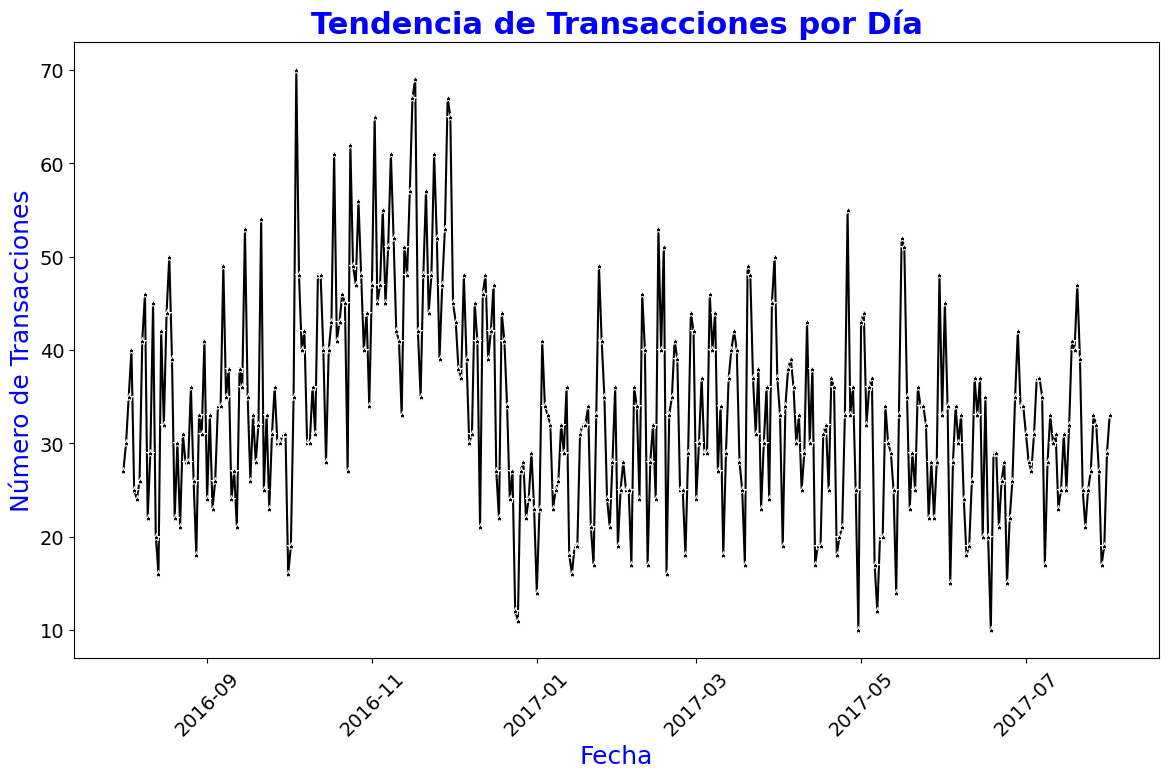

In [ ]:
transacciones_por_dia = df_traffic.groupby('date').size()
plt.figure(figsize=(14, 8))
sns.lineplot(data=transacciones_por_dia, marker='*', linestyle='-', color='black')

sns.set_style("whitegrid")
plt.title('Tendencia de Transacciones por Día', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Fecha', fontsize=18, color='blue')
plt.ylabel('Número de Transacciones', fontsize=18, color='blue')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

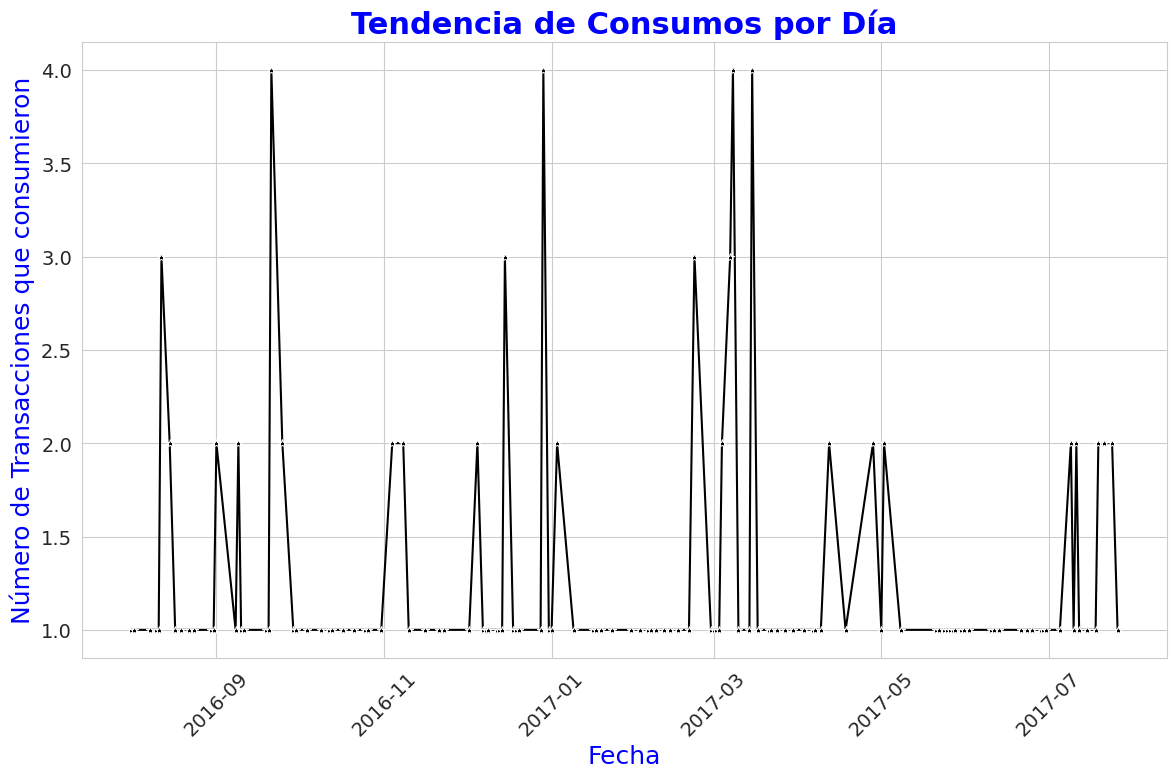

In [ ]:

transacciones_por_dia = df_consumos.groupby('date').size()
plt.figure(figsize=(14, 8))
sns.lineplot(data=transacciones_por_dia, marker='*', linestyle='-', color='black')

sns.set_style("whitegrid")
plt.title('Tendencia de Consumos por Día', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Fecha', fontsize=18, color='blue')
plt.ylabel('Número de Transacciones que consumieron', fontsize=18, color='blue')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [ ]:
## FECHAS CON MAS TRANSACCIONES

consumos_por_dia = df_traffic.groupby('date').size()
top_dias = consumos_por_dia.sort_values(ascending=False).head(30)
top_dias_df = top_dias.reset_index(name='Número de Consumos')
top_dias_df.columns = ['Fecha', 'total transacciones']
print(top_dias_df)

        Fecha  total transacciones
0  2016-10-04                   70
1  2016-11-17                   69
2  2016-11-29                   67
3  2016-11-16                   67
4  2016-11-02                   65
5  2016-11-30                   65
6  2016-10-24                   62
7  2016-11-08                   61
8  2016-10-18                   61
9  2016-11-24                   61
10 2016-11-15                   57
11 2016-11-21                   57
12 2016-10-27                   56
13 2016-11-05                   55
14 2017-04-26                   55
15 2016-09-21                   54
16 2016-11-28                   53
17 2017-02-15                   53
18 2016-09-15                   53
19 2016-11-09                   52
20 2016-11-25                   52
21 2017-05-16                   52
22 2017-05-17                   51
23 2017-02-17                   51
24 2016-11-07                   51
25 2016-11-13                   51
26 2016-08-18                   50
27 2017-03-30       

In [ ]:
## FECHAS CON MAS CONSUMOS
pd.set_option('display.max_rows', None)


consumos_por_dia = df_consumos.groupby('date').size()
top_dias = consumos_por_dia.sort_values(ascending=False).head(20)
top_dias_df = top_dias.reset_index(name='Número de Consumos')
top_dias_df.columns = ['Fecha', 'total transacciones']
print(top_dias_df)

        Fecha  total transacciones
0  2016-12-29                    4
1  2016-09-21                    4
2  2017-03-15                    4
3  2017-03-08                    4
4  2016-08-12                    3
5  2016-12-15                    3
6  2017-02-22                    3
7  2017-03-07                    3
8  2016-11-08                    2
9  2016-09-09                    2
10 2016-12-05                    2
11 2017-04-28                    2
12 2017-04-12                    2
13 2016-11-04                    2
14 2017-01-03                    2
15 2016-09-25                    2
16 2016-09-01                    2
17 2017-07-11                    2
18 2017-07-24                    2
19 2017-07-21                    2


### Mes con mas consumos

La identificación de diciembre y marzo como los meses con mayores consumos, asociados a festividades significativas como el Año Nuevo y diversas celebraciones de la temporada primaveral, incluyendo el Día de San Patricio en Estados Unidos, sugiere una marcada influencia de estas fechas en el comportamiento de compra de los consumidores. Este patrón refleja cómo las tradiciones culturales y las festividades pueden motivar un aumento en las actividades de compra, posiblemente debido a la compra de regalos, preparativos para celebraciones, o aprovechamiento de ofertas y promociones especiales.

Para capturar el efecto de estas temporadas festivas en las transacciones, se creara una variable categórica que refleje los períodos de alta actividad comercial.

Incluir esta variable en análisis de datos permitirá realizar comparaciones más precisas sobre el volumen de transacciones entre diferentes períodos, ayudando a entender mejor el impacto de las festividades en el consumo. Además, esta información puede ser valiosa para la planificación estratégica de negocios, permitiendo a las empresas anticiparse a los picos de demanda mediante la gestión adecuada de inventarios, la optimización de campañas de marketing y la preparación de ofertas y promociones que se alineen con el interés y comportamiento de compra de los consumidores durante estas temporadas clave.

In [ ]:
## MES CON MAS CONSUMOS
consumos_por_dia = df_traffic.groupby('mes').size()
top_dias = consumos_por_dia.sort_values(ascending=False).head(12)
top_dias_df = top_dias.reset_index(name='Número de Consumos')
top_dias_df.columns = ['mes', 'total transacciones']
print(top_dias_df)

    mes  total transacciones
0    11                 1519
1    10                 1285
2     3                 1072
3    12                 1053
4     8                 1013
5     9                  973
6     5                  950
7     7                  927
8     4                  898
9     2                  886
10    1                  871
11    6                  836


In [ ]:
df_dias_transacciones = df_traffic.groupby('date').size()
df_dias_consumos = df_consumos.groupby('date').size()

In [ ]:
df_dias_transacciones.head(5)

date
2016-08-01    27
2016-08-02    30
2016-08-03    35
2016-08-04    40
2016-08-05    25
dtype: int64

In [ ]:
df_dias_consumos.head(20)

date
2016-08-01    1
2016-08-02    1
2016-08-08    1
2016-08-10    1
2016-08-11    1
2016-08-12    3
2016-08-15    2
2016-08-17    1
2016-08-19    1
2016-08-22    1
2016-08-24    1
2016-08-30    1
2016-08-31    1
2016-09-01    2
2016-09-08    1
2016-09-09    2
2016-09-10    1
2016-09-11    1
2016-09-19    1
2016-09-20    1
dtype: int64

### Analisis por Hora

El análisis de datos de consumo por hora revela patrones significativos en los hábitos de compra de los consumidores, ofreciendo insights sobre los momentos del día en que la actividad de compra es más intensa. Este tipo de análisis es particularmente útil para ajustar estrategias de marketing, optimización de la experiencia de usuario en plataformas de e-commerce, y para la planificación de recursos en operaciones digitales, de acuerdo a nuestra informacion recopilada se identifica que desde las 12:00 p hasta las 24:00 pm son las horas de mayor actividad.


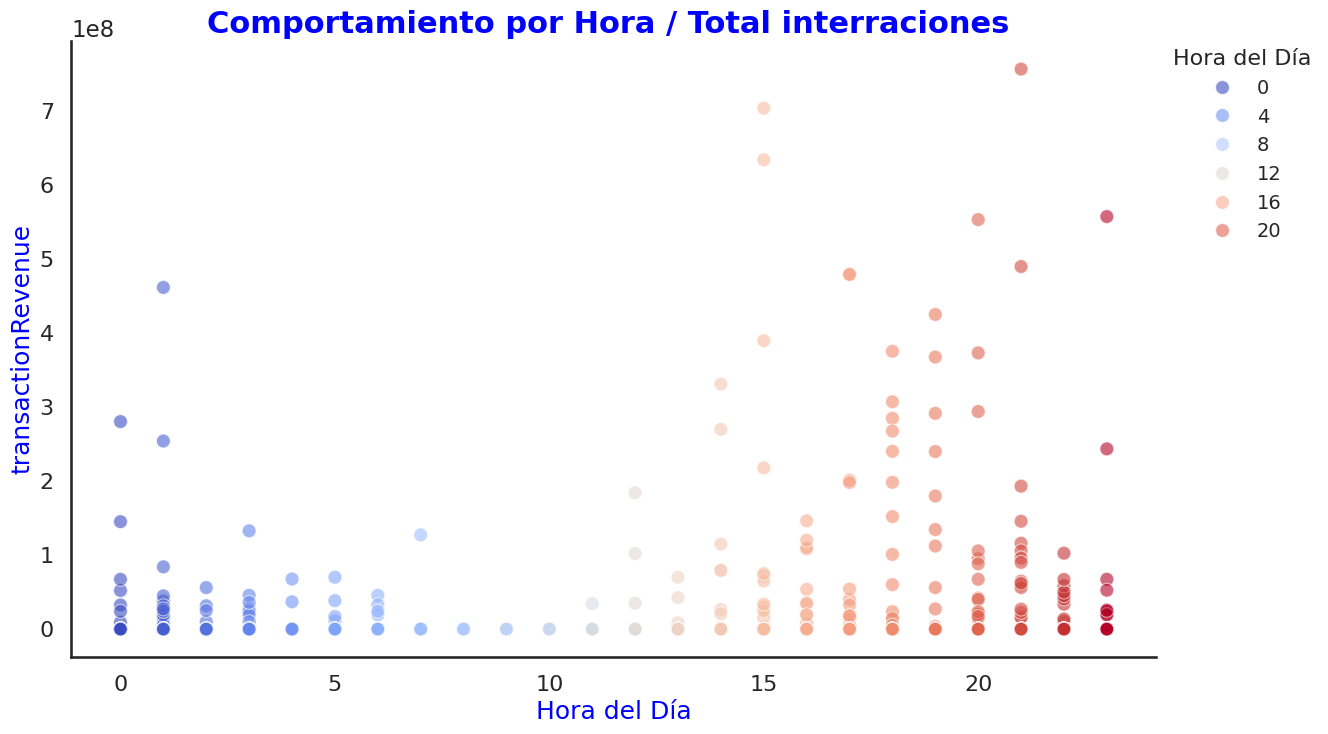

In [ ]:
# Se Puede observar que el mayot flujo transacciones es en horas de la tarde
## Comportamiento por Hora de transacciones totales

sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(14, 8))

scatter = sns.scatterplot(x='hora', y='transactionRevenue', data=df_traffic,
                          alpha=0.6, edgecolor='w', s=100,
                          hue='hora', palette='coolwarm')
sns.despine()
plt.title('Comportamiento por Hora / Total interraciones ', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Hora del Día', fontsize=18, color='blue')
plt.ylabel('transactionRevenue', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

plt.legend(title='Hora del Día', title_fontsize='16', fontsize='14', loc='upper right',
           bbox_to_anchor=(1.15, 1), borderaxespad=0., frameon=False)
plt.show()

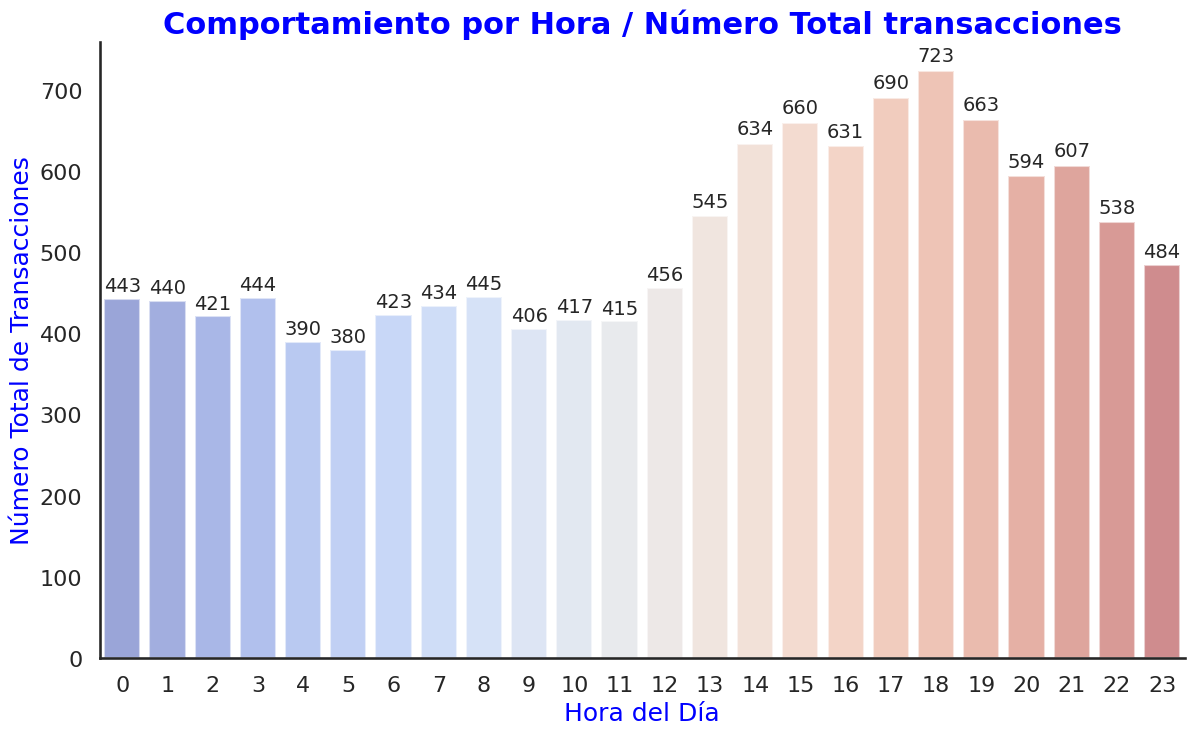

In [ ]:
# Comportamiento por Hora / Número Total de Transacciones

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='hora', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por Hora / Número Total transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Hora del Día', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['hora'].value_counts().sort_index()
for index, bar in enumerate(bar_plot.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             '{}'.format(conteos_por_hora[index]), ha='center', va='bottom', fontsize=14)

plt.show()

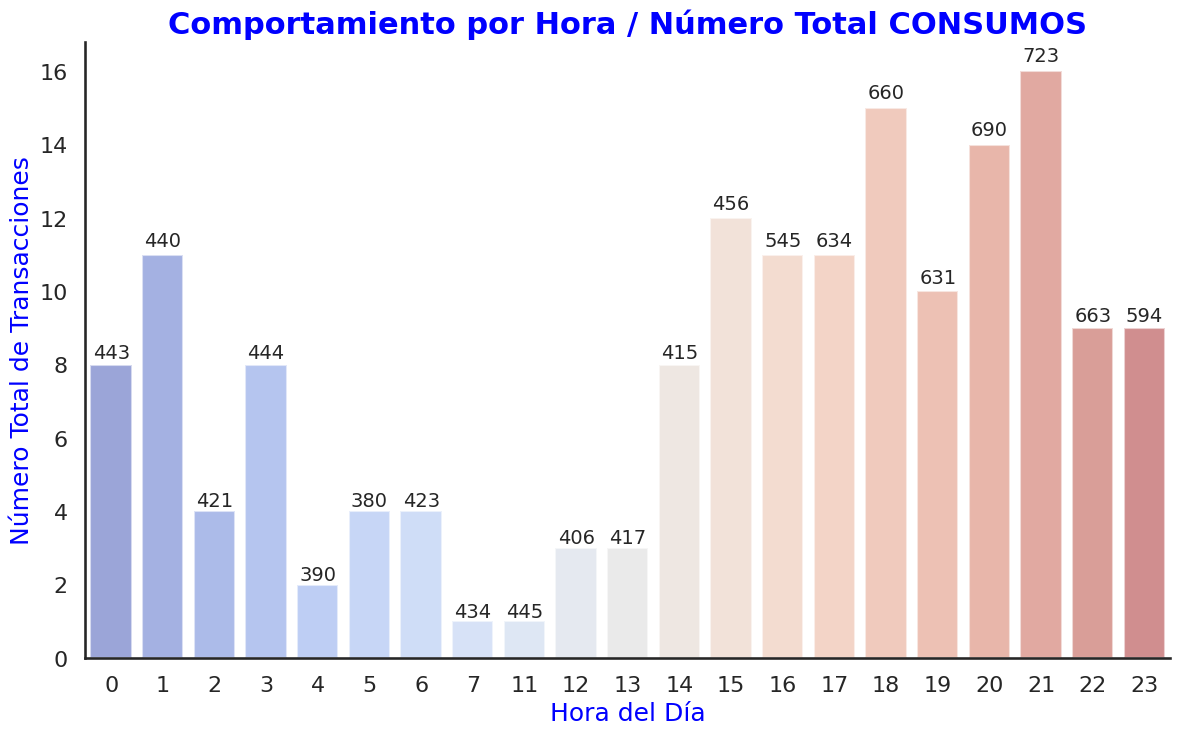

In [ ]:
# Comportamiento mes / Número Total de Transacciones

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='hora', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por Hora / Número Total CONSUMOS', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Hora del Día', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['hora'].value_counts().sort_index()
for index, bar in enumerate(bar_plot.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             '{}'.format(conteos_por_hora[index]), ha='center', va='bottom', fontsize=14)

plt.show()

### Se agrupa en cuatro horarios, para poder identificar donde se presentan mas las transacciones y consumos:

La agrupación de las transacciones y consumos en cuatro horarios distintos es una estrategia eficaz para simplificar el análisis de datos y obtener insights más claros sobre los patrones de compra. Si las compras se presentan más en los horarios de la tarde, desde las 12:00 pm hasta las 24:00 pm, esto sugiere una tendencia clara en el comportamiento de los consumidores, preferentemente orientada hacia las actividades de compra en la segunda mitad del día.

Para este tipo de análisis, se divide el día en los siguientes cuatro intervalos:

Mañana (6:00 am - 12:00 pm): Este horario captura las actividades de compra temprano en el día, que pueden incluir compras impulsadas por necesidades de último minuto o la realización de pedidos planificados previamente.

Tarde (12:00 pm - 18:00 pm): Este intervalo cubre las horas después del mediodía hasta el comienzo de la noche. Este periodo parece ser crítico para las transacciones y consumos, posiblemente debido a las pausas para el almuerzo o el tiempo libre que las personas pueden tener para realizar compras en línea o físicas.

Noche (18:00 pm - 24:00 pm): Este periodo abarca las horas de la tarde hasta la medianoche. Las compras en este horario podrían estar influenciadas por la conclusión de la jornada laboral, compras de última hora, o actividades de ocio que incluyen compras en línea.

Madrugada (0:00 am - 6:00 am): Aunque este intervalo suele tener menos actividad de compra en comparación con otros momentos del día, es importante monitorearlo para identificar comportamientos de nicho o tendencias emergentes, como compras impulsivas nocturnas o compras internacionales en zonas horarias diferentes.

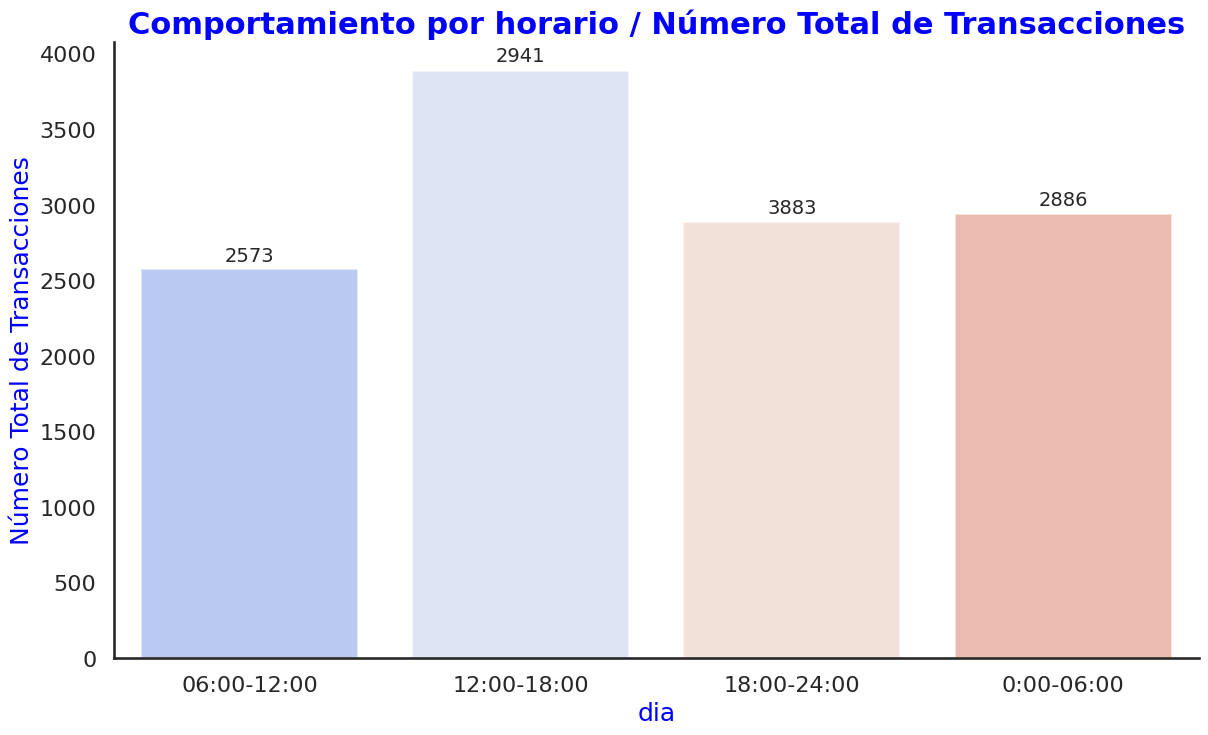

In [ ]:
# Comportamiento horario / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='horario', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por horario / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('dia', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['horario'].value_counts().sort_index()
for index, bar in enumerate(bar_plot.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             '{}'.format(conteos_por_hora[index]), ha='center', va='bottom', fontsize=14)

plt.show()

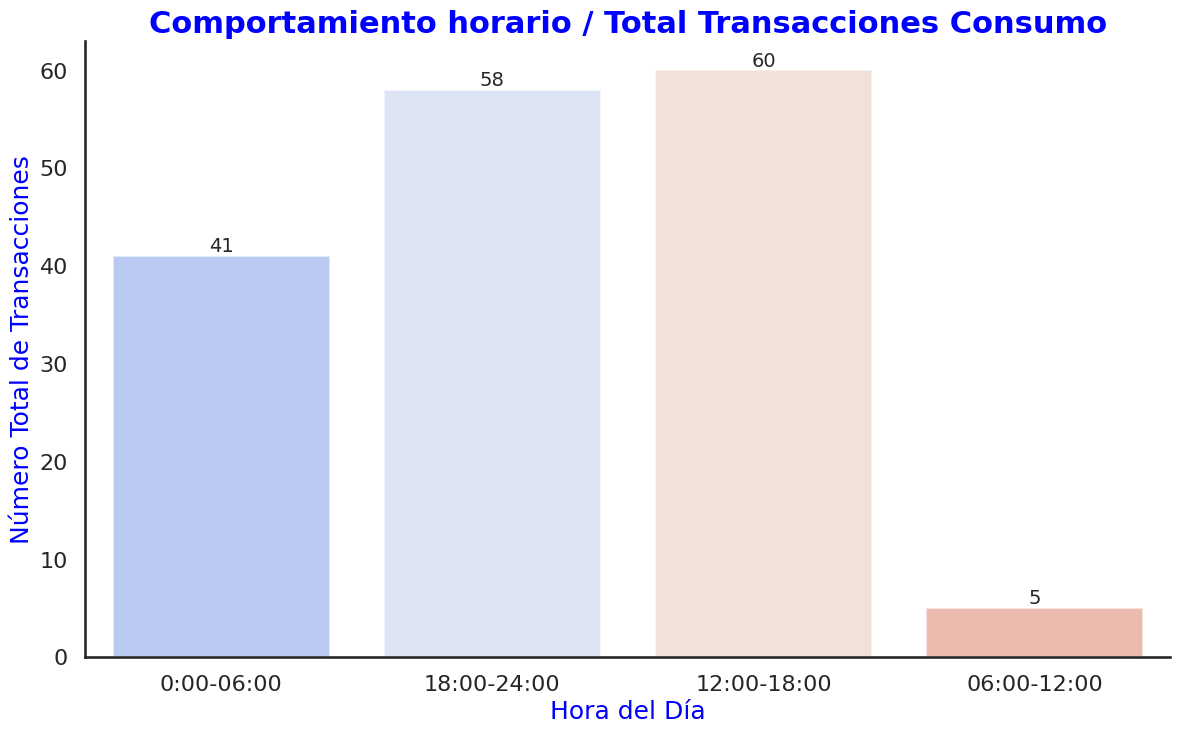

In [ ]:
# Comportamiento por horario / Número Total de Transacciones CONSUMO

plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='horario', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento horario / Total Transacciones Consumo', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Hora del Día', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos.groupby('horario').size()
for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=14)

## Análisis de Días de la Semana en Transaccionalidad y Consumo


Esto indica que el martes y el miércoles son los días de mayor actividad en términos de número total de transacciones, destacándose como los momentos de la semana con mayor volumen de operaciones comerciales.

A pesar de que el martes tiene un alto volumen de transacciones, el análisis revela que el miércoles, seguido por el lunes, son los días donde se presentan más consumos. Esto sugiere que, aunque el martes sea significativo en cuanto a la cantidad de transacciones, el miércoles y el lunes son más relevantes en términos de la cantidad de consumos, reflejando posiblemente una mayor diversidad de compras realizadas o una mayor participación de consumidores activos en estos días.

Este análisis proporciona insights valiosos para la toma de decisiones en varios ámbitos del negocio:

Diseñar campañas de marketing dirigidas específicamente para los lunes y miércoles, con el objetivo de captar la atención de los consumidores en los días de mayor actividad de compra. Esto puede incluir ofertas especiales, descuentos, o promociones temáticas que incentiven aún más el consumo.

Asegurar que el inventario esté óptimamente preparado para satisfacer la demanda de los consumidores los lunes y miércoles, ajustando los niveles de stock basándose en los patrones de consumo observados.

Alinear los recursos de operaciones, logística, y soporte al cliente para asegurar una experiencia de compra fluida durante los picos de actividad, especialmente en los días identificados como de mayor consumo.

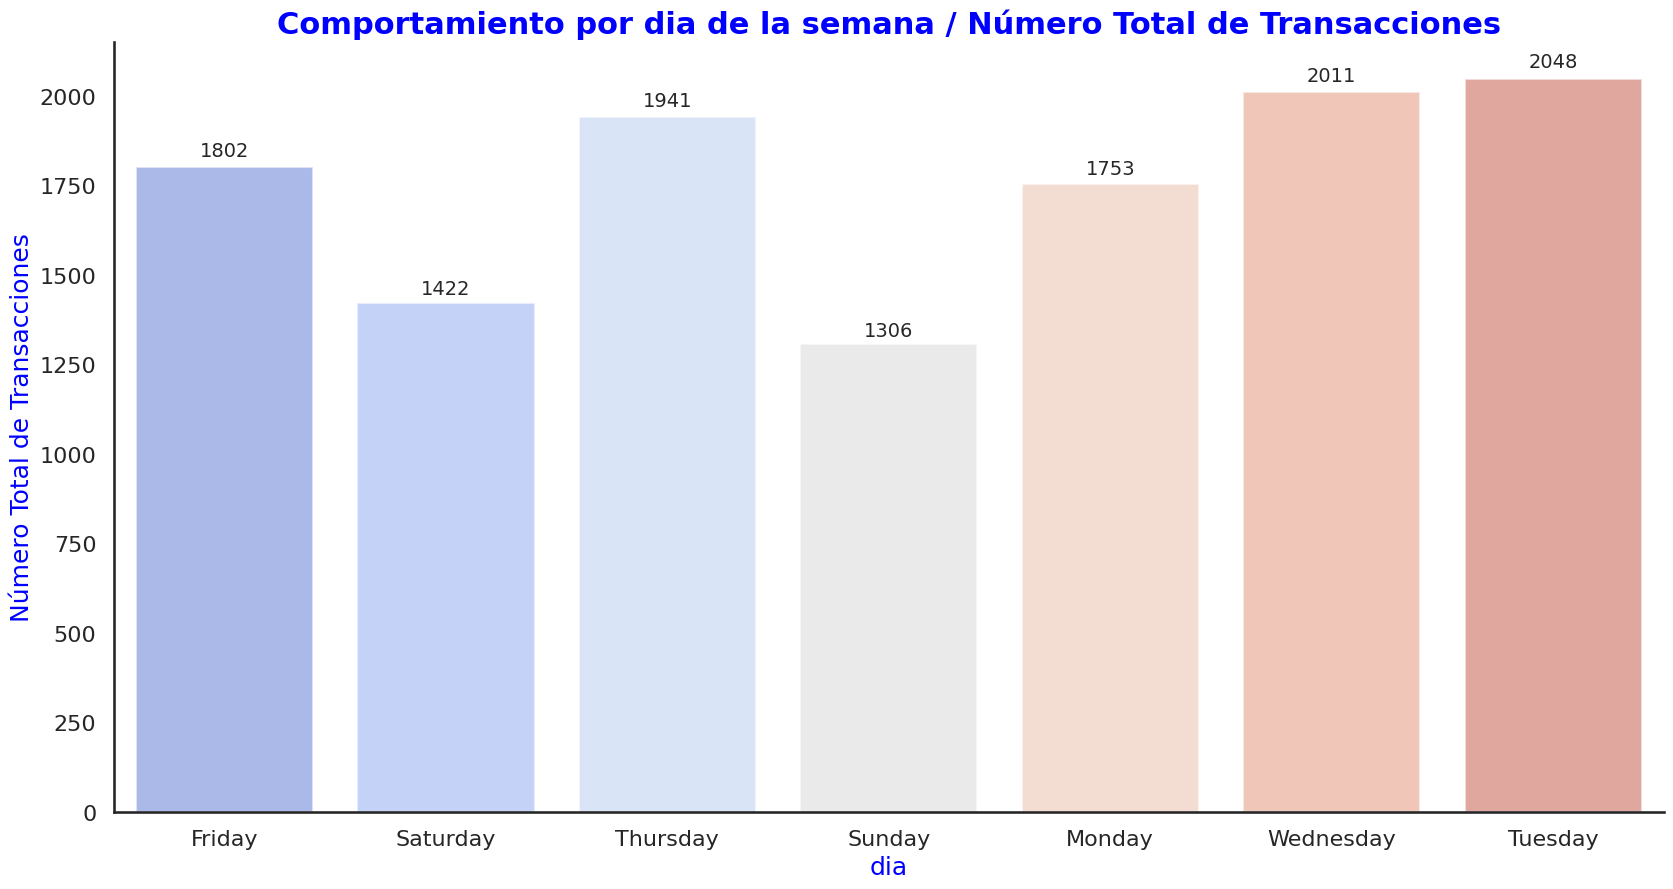

In [ ]:
# Comportamiento dia de la semana / Número Total de Transacciones
plt.figure(figsize=(20, 10))


bar_plot = sns.barplot(x='dia_semana_nombre', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por dia de la semana / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('dia', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)


conteos_por_dia_semana = df_traffic['dia_semana_nombre'].value_counts().sort_index()

for bar in bar_plot.patches:
    day = bar.get_x() + bar.get_width() / 2.
    day_label = bar_plot.get_xticklabels()[int(day)].get_text()
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             '{}'.format(conteos_por_dia_semana[day_label]), ha='center', va='bottom', fontsize=14)

plt.show()

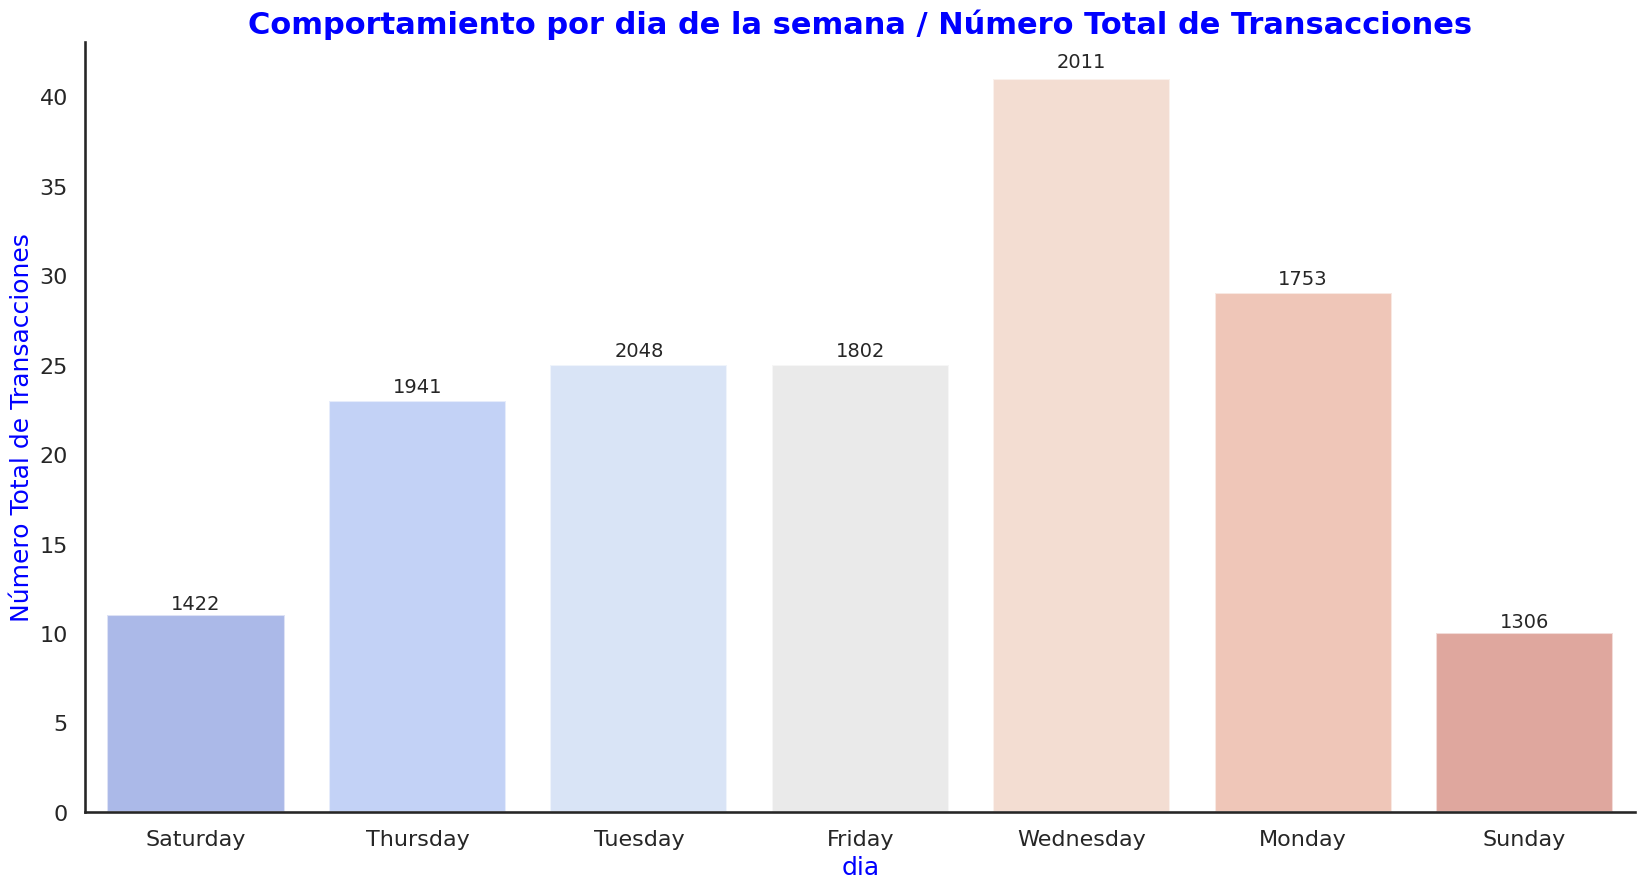

In [ ]:
# Comportamiento por  dia / Número Total de Transacciones CONSUMO

plt.figure(figsize=(20, 10))


bar_plot = sns.barplot(x='dia_semana_nombre', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por dia de la semana / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('dia', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)


conteos_por_dia_semana = df_traffic['dia_semana_nombre'].value_counts().sort_index()

for bar in bar_plot.patches:
    day = bar.get_x() + bar.get_width() / 2.
    day_label = bar_plot.get_xticklabels()[int(day)].get_text()
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             '{}'.format(conteos_por_dia_semana[day_label]), ha='center', va='bottom', fontsize=14)

plt.show()

## Recurrecenia de los usuarios


El análisis de la recurrencia de los usuarios, especialmente aquellos que efectúan compras, ofrece insights valiosos sobre el comportamiento de compra y la eficacia de las estrategias de marketing digital. Si se observa que una gran parte de los usuarios realiza solo una compra (1 recurrencia).

Interpretación del Comportamiento de Usuario

Decisión de Compra Preestablecida: El hecho de que muchos usuarios compren con solo una recurrencia puede indicar que llegan al sitio con una decisión de compra ya tomada. Esto sugiere que la influencia que lleva a la decisión de compra ocurre fuera de la plataforma de e-commerce.

Los usuarios pueden estar siendo influenciados por publicidad o contenido en otras plataformas antes de visitar la página de compra. Esto subraya la importancia de tener una presencia y estrategia de marketing integrada en múltiples canales.

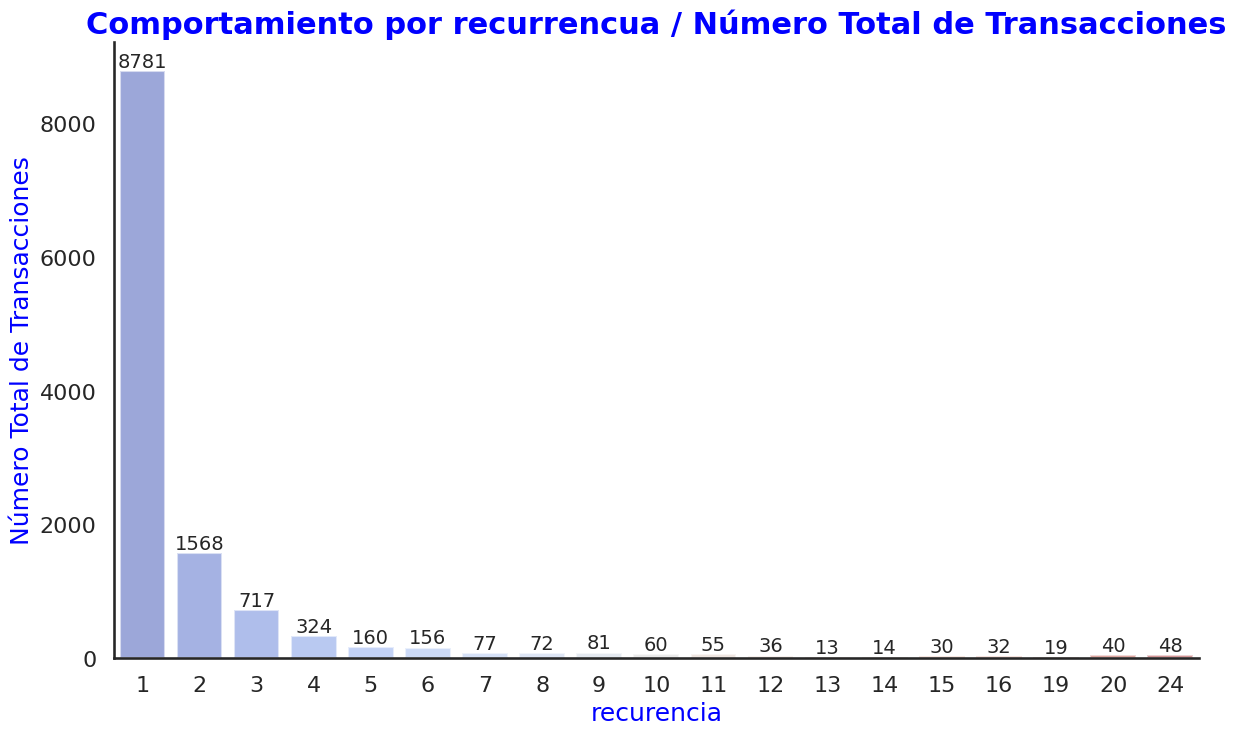

In [ ]:
# Comportamiento horario / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='recurrencia', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por recurrencua / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('recurencia', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['recurrencia'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

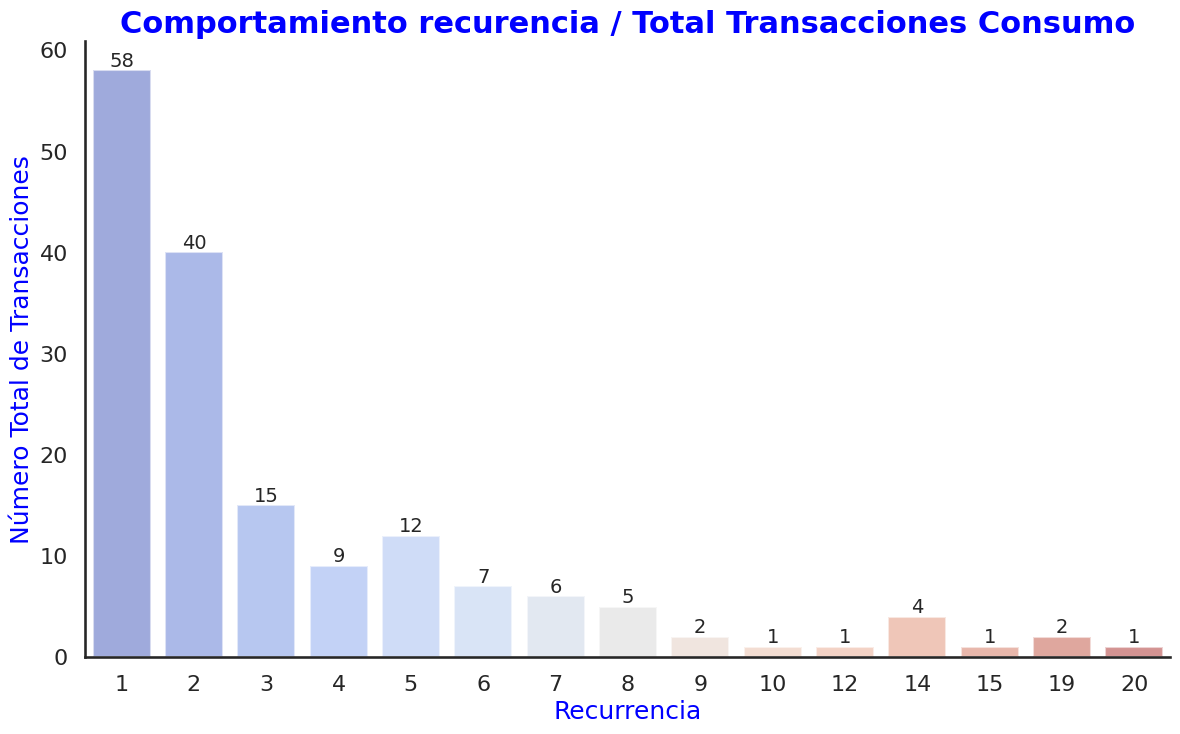

In [ ]:
# Comportamiento por recurencia/ Número Total de Transacciones CONSUMO
plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='recurrencia', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento recurencia / Total Transacciones Consumo', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Recurrencia', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos.groupby('recurrencia').size()
for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=14)
plt.show()

## ANALISIS POR PAISES

Estados Unidos representa el mercado principal para los consumos. Esto podría deberse a varios factores, incluyendo la accesibilidad del sitio web en este país, la relevancia de los productos o servicios ofrecidos para este público, y la efectividad de las estrategias de marketing dirigidas a esta audiencia.

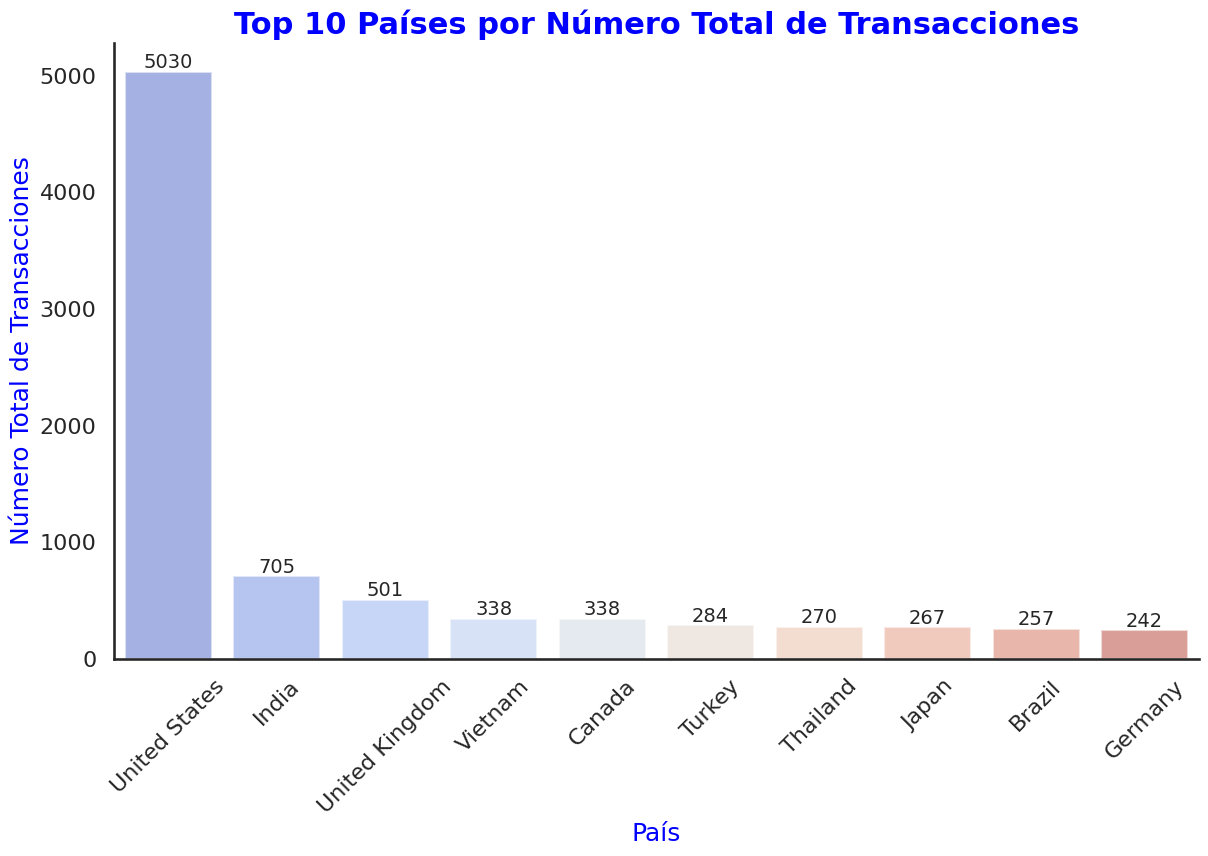

In [ ]:
top_10_paises = df_traffic['country'].value_counts().nlargest(10).index

df_top_10 = df_traffic[df_traffic['country'].isin(top_10_paises)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='country', y='hora', data=df_top_10, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_10_paises)

sns.despine()
plt.title('Top 10 Países por Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('País', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos_por_pais = df_top_10['country'].value_counts().reindex(top_10_paises)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

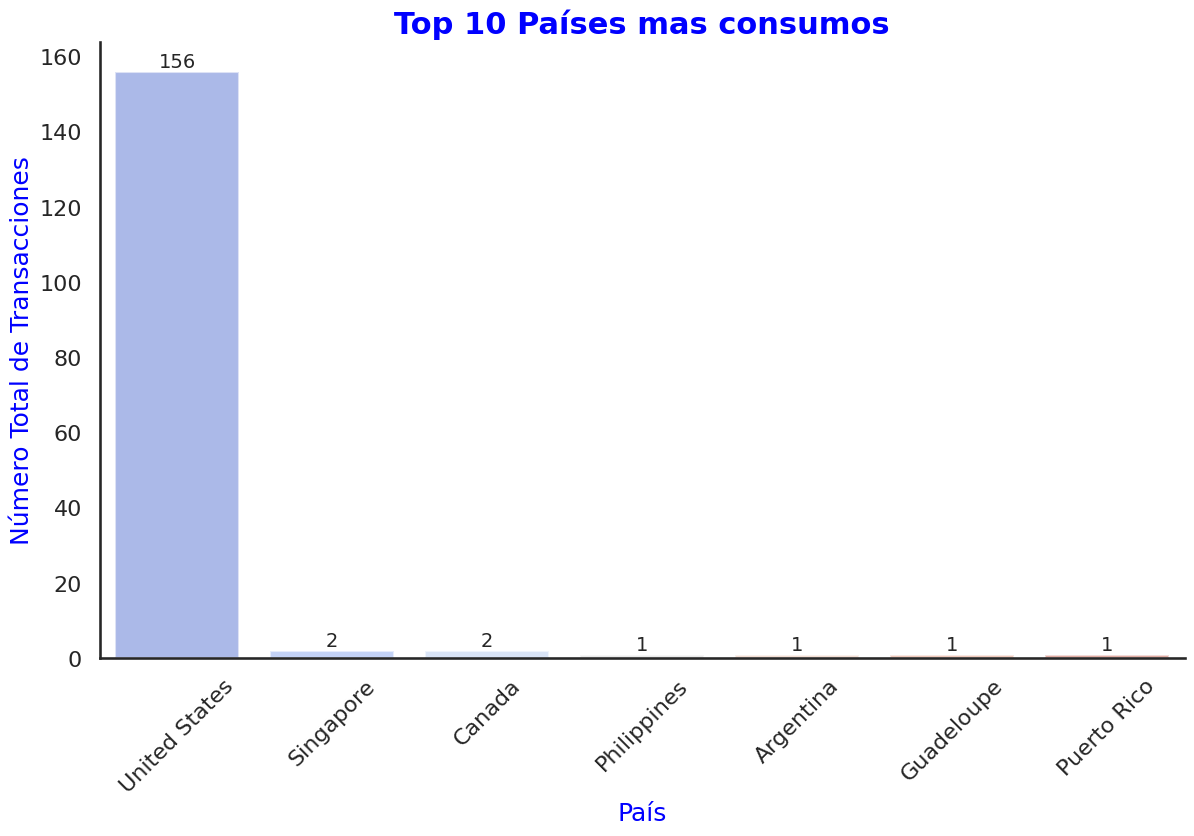

In [ ]:
top_10_paises = df_consumos['country'].value_counts().nlargest(10).index

df_top_10 = df_consumos[df_consumos['country'].isin(top_10_paises)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='country', y='hora', data=df_top_10, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_10_paises)

sns.despine()
plt.title('Top 10 Países mas consumos', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('País', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos_por_pais = df_top_10['country'].value_counts().reindex(top_10_paises)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

## ANALSIS RESTO DE VARIABLES

El hallazgo de que existe una mayor incidencia de consumos desde sistemas operativos Macintosh ofrece insights importantes sobre el perfil tecnológico y las preferencias de los consumidores

 Los usuarios de Macintosh suelen asociarse con ciertos perfiles demográficos y psicográficos, como profesionales creativos, individuos con un poder adquisitivo más alto y usuarios que valoran mucho la experiencia de usuario y el diseño. Esta tendencia podría indicar ue los clientes se alinea con estos perfiles.

La marcada preferencia por los equipos de escritorio sobre los dispositivos móviles para realizar compras online ofrece una oportunidad valiosa para optimizar la experiencia de usuario y las estrategias de marketing en ambos tipos de plataformas. Entender las necesidades y preferencias de los usuarios es clave para aumentar la satisfacción del cliente, mejorar las tasas de conversión y adaptar el negocio a las tendencias de comportamiento digital. Aunque la tendencia actual favorezca a los dispositivos de escritorio, es importante no descuidar la experiencia móvil, dado el crecimiento constante del comercio electrónico móvil y el cambio en los hábitos de consumo.

El comportamiento de los consumidores podría haber evolucionado después de la pandemia del COVID-19. La pandemia ha acelerado la adopción digital y modificado significativamente los hábitos de compra, incluida la preferencia por dispositivos y sistemas operativos, así como la manera en que los consumidores interactúan con las plataformas de e-commerce.

Posibles Cambios en el Comportamiento del Consumidor Post-Pandemia

Aumento en la Compra Móvil: Durante y después de la pandemia, es probable que se haya observado un aumento en la utilización de dispositivos móviles para realizar compras, dada la necesidad de accesibilidad y la mayor familiaridad de los usuarios con las tecnologías móviles.

Cambio en el Perfil de Consumidores de Macintosh: Aunque los usuarios de Macintosh históricamente han tenido ciertos perfiles demográficos y psicográficos, la expansión del teletrabajo y los cambios en el mercado laboral podrían haber diversificado este perfil.

Nueva Valoración de la Experiencia de Usuario: La pandemia ha puesto de relieve la importancia de una experiencia de usuario fluida, segura y cómoda, tanto en dispositivos móviles como de escritorio, adaptándose a las nuevas expectativas de los consumidores.

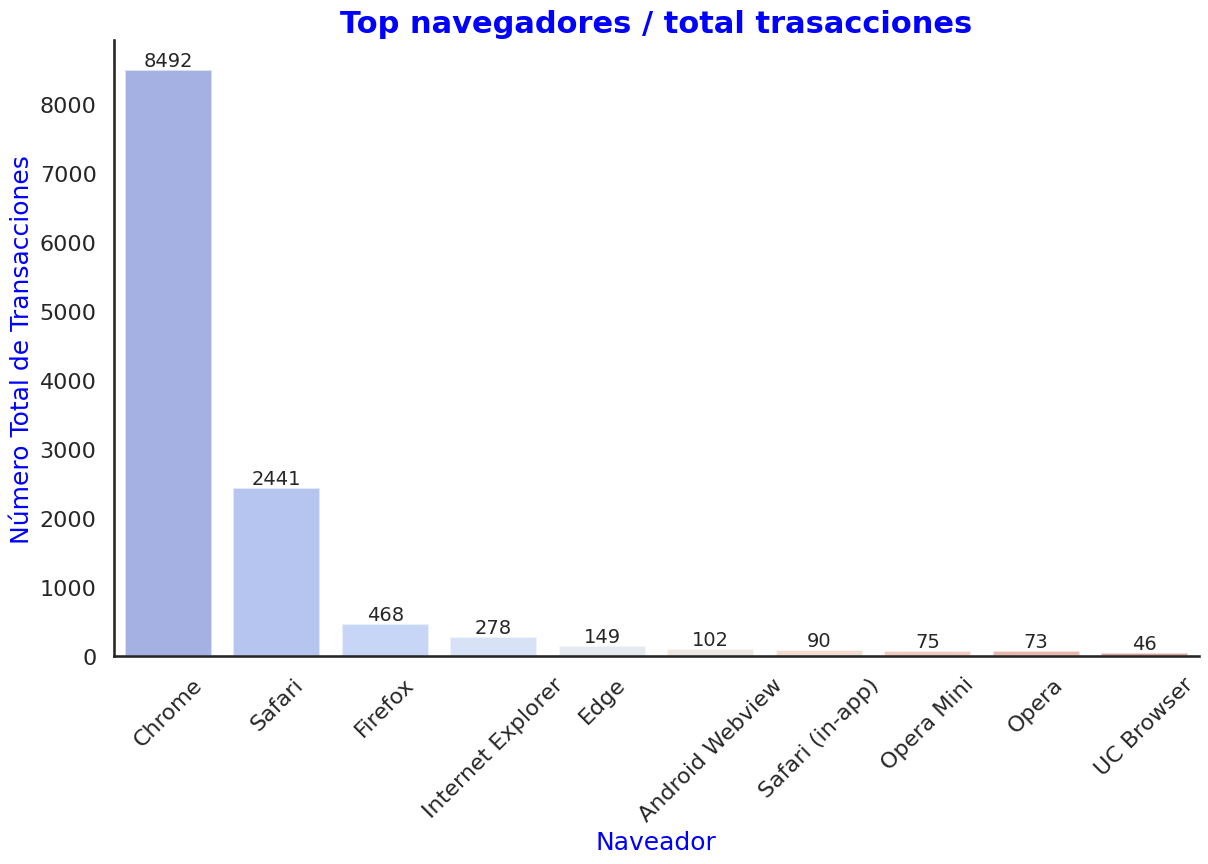

In [ ]:
top_browser = df_traffic['browser'].value_counts().nlargest(10).index

df_top = df_traffic[df_traffic['browser'].isin(top_browser)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='browser', y='hora', data=df_top, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_browser)

sns.despine()
plt.title('Top navegadores / total trasacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Naveador', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos = df_top['browser'].value_counts().reindex(top_browser)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

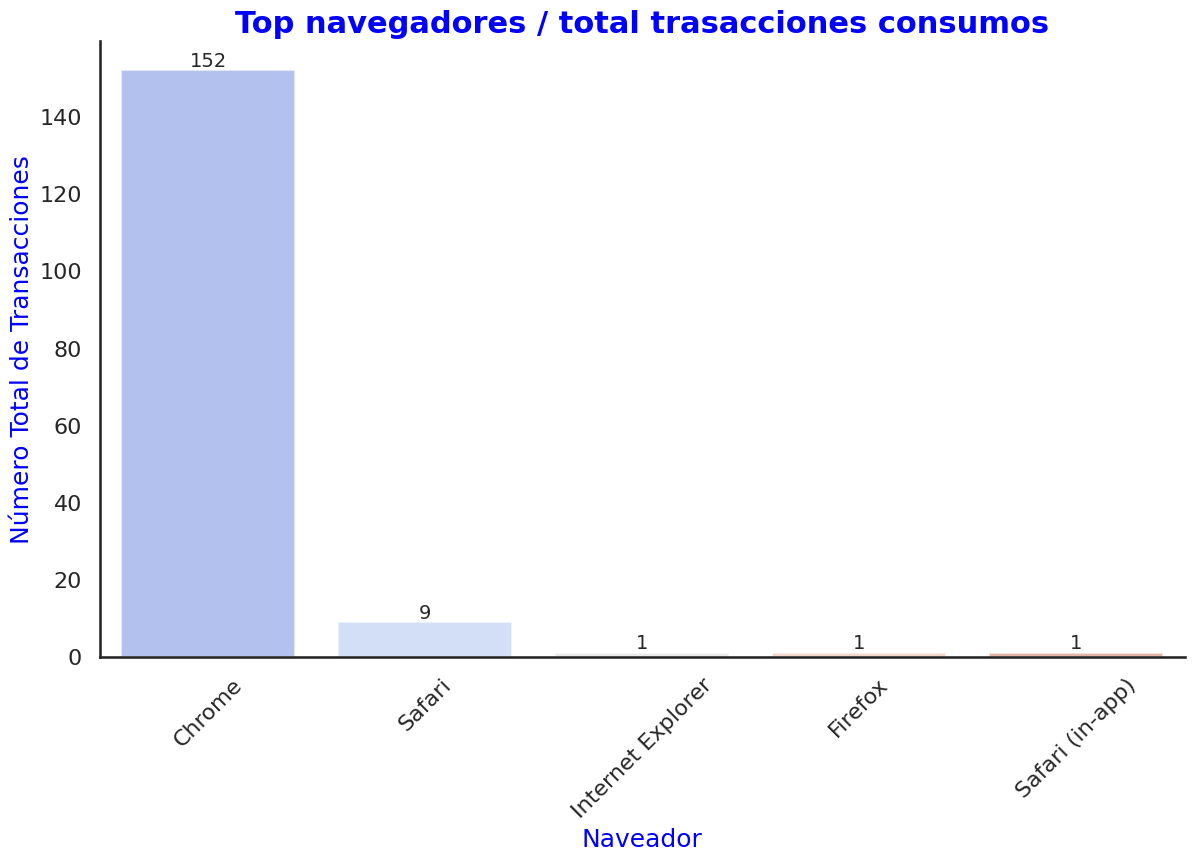

In [ ]:
top_browser = df_consumos['browser'].value_counts().nlargest(10).index

df_top = df_consumos[df_traffic['browser'].isin(top_browser)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='browser', y='hora', data=df_top, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_browser)

sns.despine()
plt.title('Top navegadores / total trasacciones consumos', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Naveador', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos = df_top['browser'].value_counts().reindex(top_browser)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

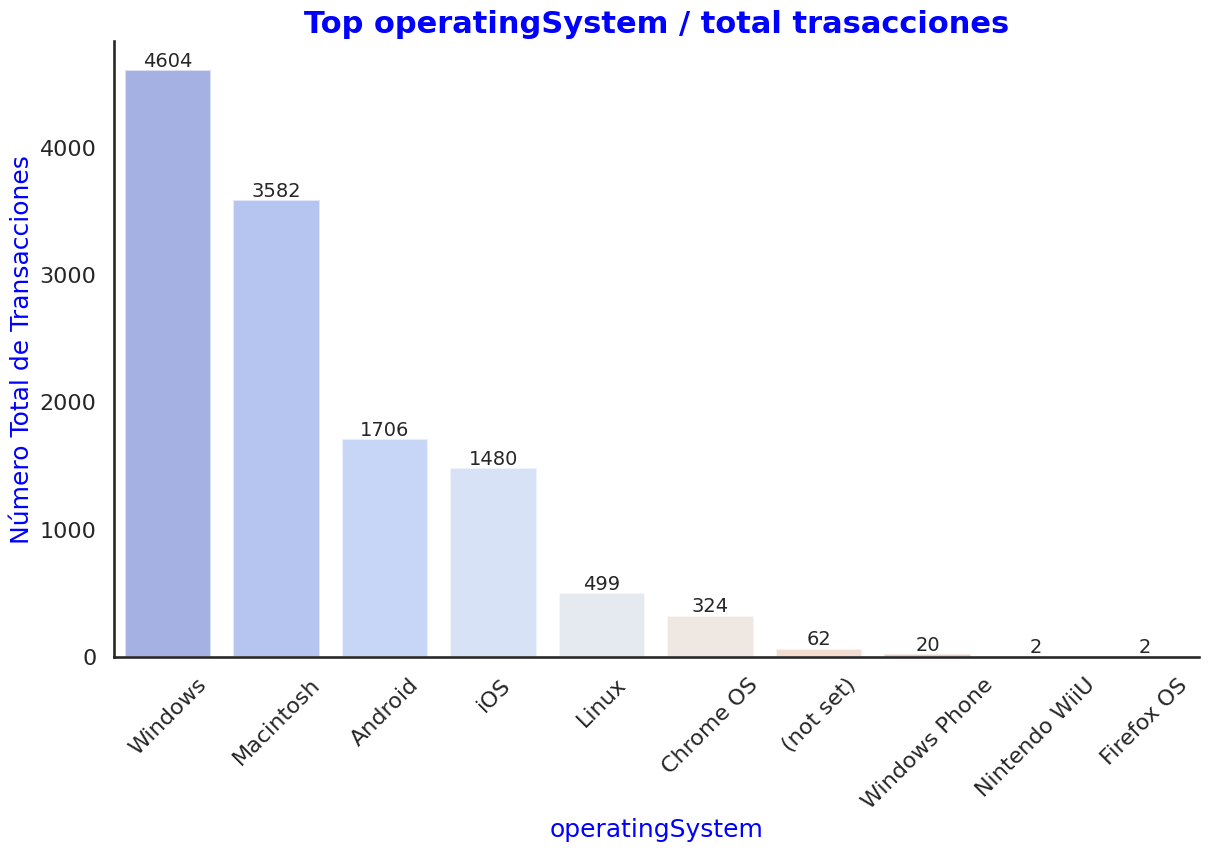

In [ ]:
top_browser = df_traffic['operatingSystem'].value_counts().nlargest(10).index

df_top = df_traffic[df_traffic['operatingSystem'].isin(top_browser)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='operatingSystem', y='hora', data=df_top, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_browser)

sns.despine()
plt.title('Top operatingSystem / total trasacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('operatingSystem', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos = df_top['operatingSystem'].value_counts().reindex(top_browser)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

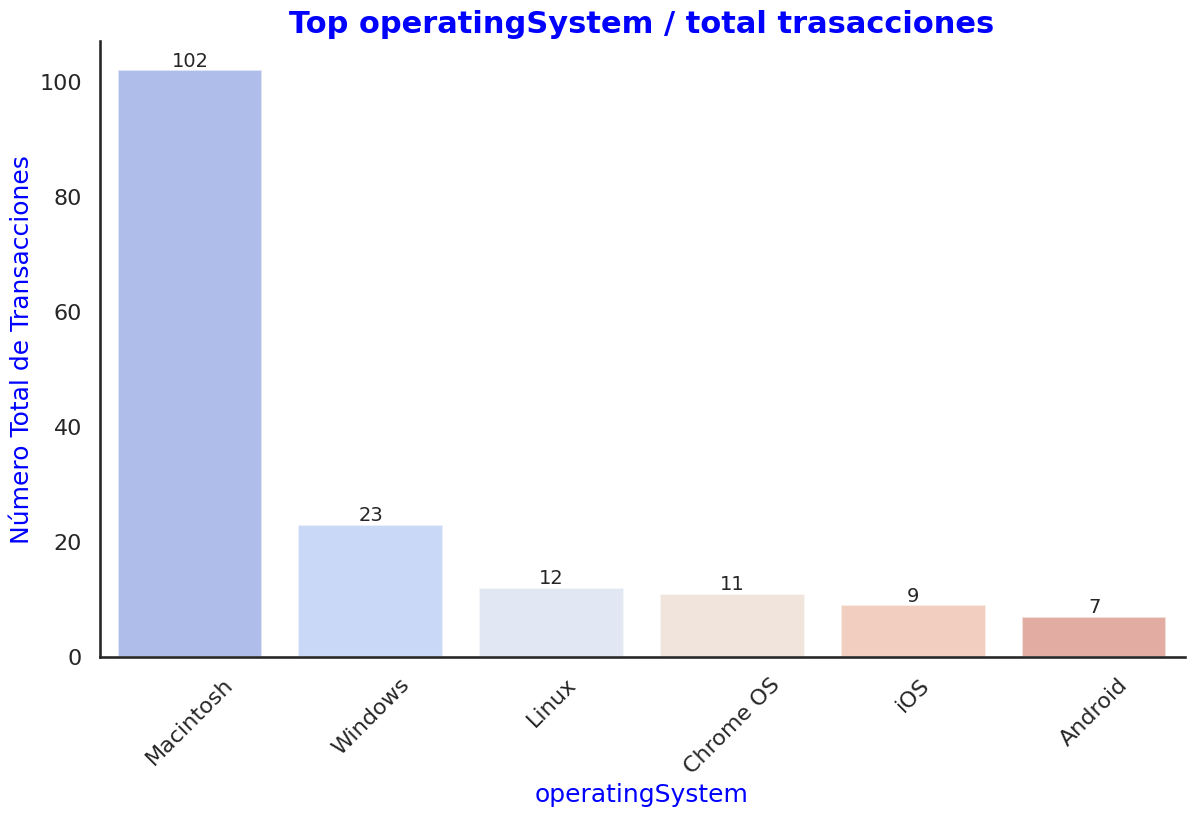

In [ ]:
top_browser = df_consumos['operatingSystem'].value_counts().nlargest(10).index

df_top = df_consumos[df_consumos['operatingSystem'].isin(top_browser)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='operatingSystem', y='hora', data=df_top, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_browser)

sns.despine()
plt.title('Top operatingSystem / total trasacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('operatingSystem', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos = df_top['operatingSystem'].value_counts().reindex(top_browser)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

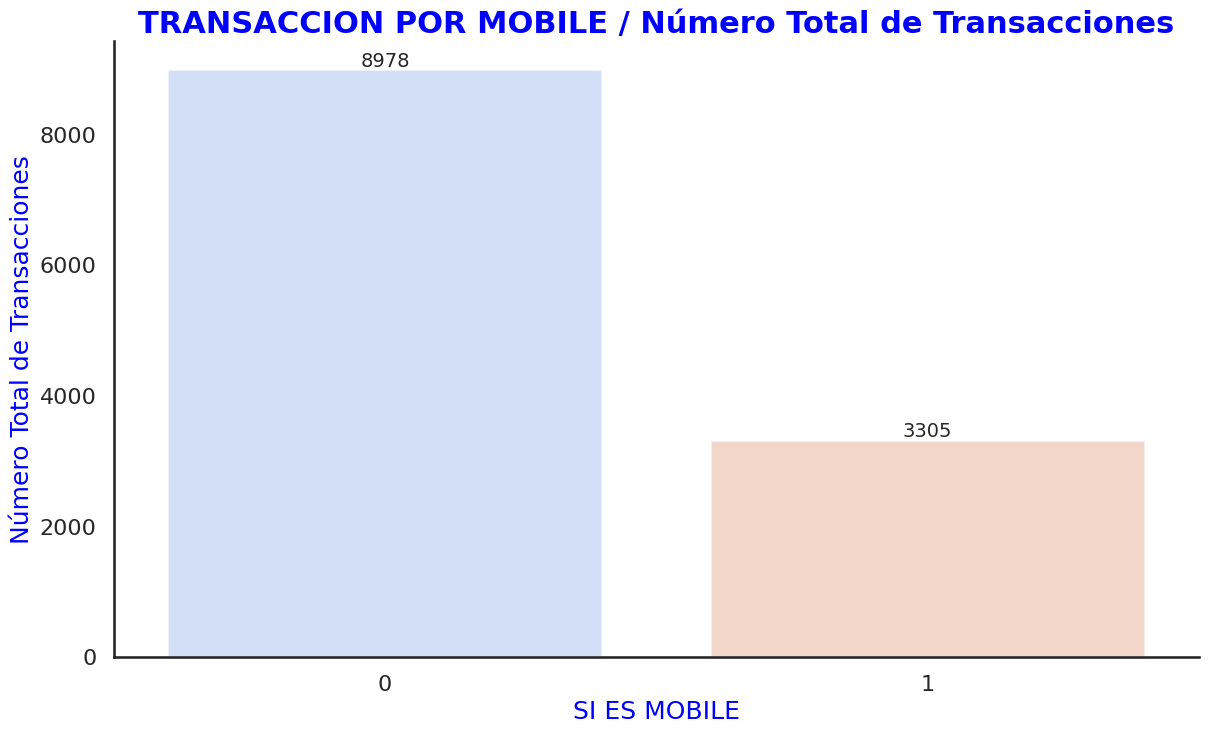

In [ ]:
# MOBILE / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='isMobile', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('TRANSACCION POR MOBILE / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('SI ES MOBILE', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['isMobile'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

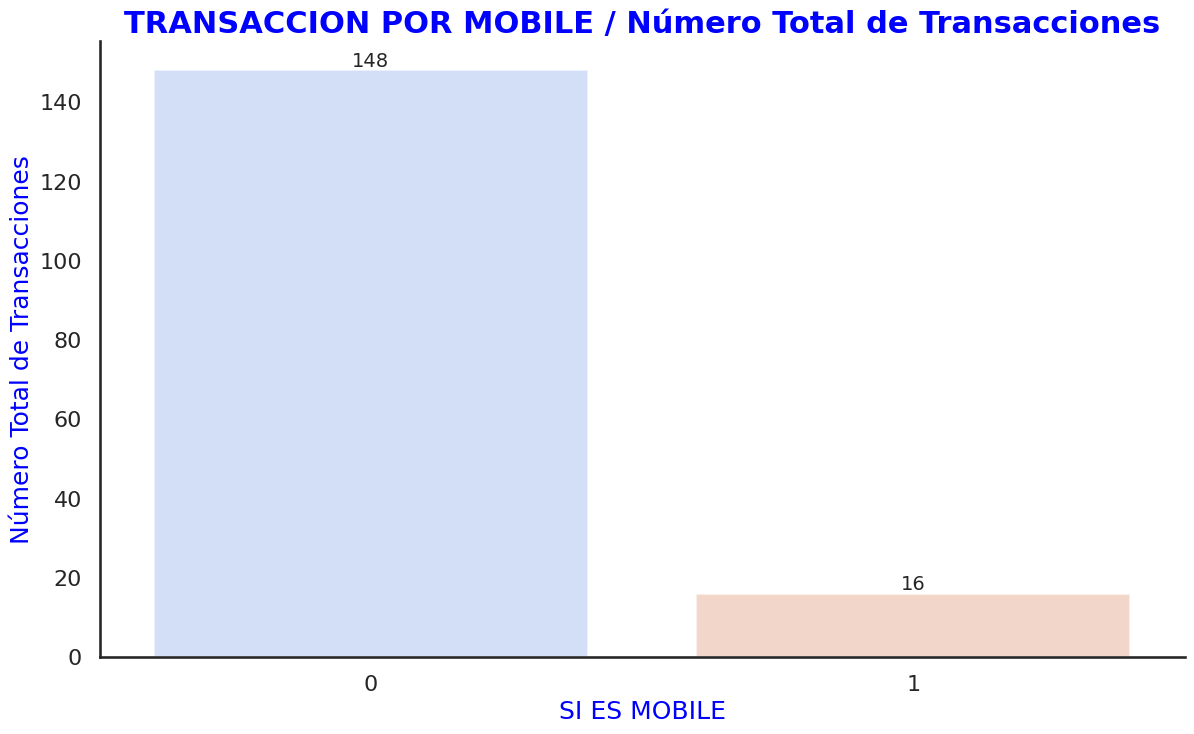

In [ ]:
# MOBILE / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='isMobile', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('TRANSACCION POR MOBILE / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('SI ES MOBILE', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos['isMobile'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

## BUSCADORES
"campaign" no muestra relevancia en el análisis debido a que la mayoría de los usuarios que efectuaron consumos se encuentran en el acumulado "no set"

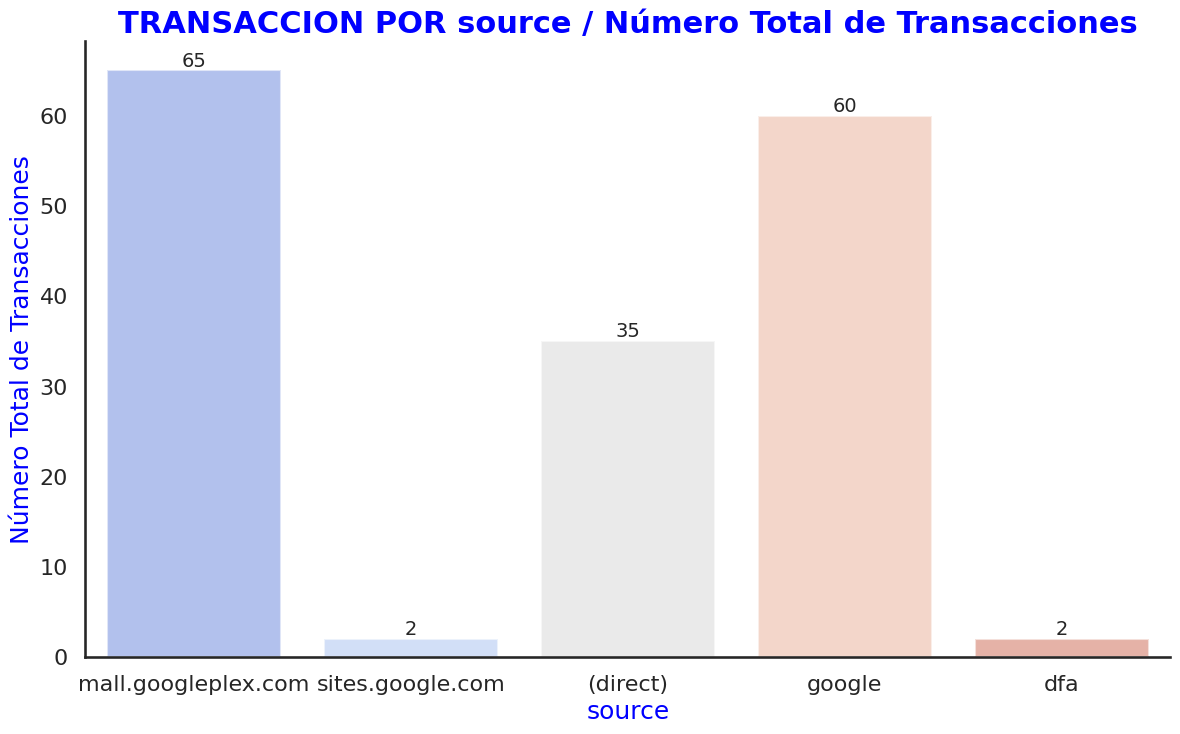

In [ ]:
# source / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='source', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('TRANSACCION POR source / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('source', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos['source'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

In [ ]:
conteo_buscadores = df_traffic.groupby('campaign')['source','medium'].value_counts()
conteo_buscadores

campaign                                         source                                             medium   
(not set)                                        google                                             organic      5076
                                                 youtube.com                                        referral     2882
                                                 (direct)                                           (none)       2011
                                                 mall.googleplex.com                                referral      923
                                                 analytics.google.com                               referral      216
                                                 dfa                                                cpm            71
                                                 google.com                                         referral       51
                                                 sites.google.co

In [ ]:
conteo_buscadores = df_consumos.groupby('campaign')['source','medium'].value_counts()
conteo_buscadores

campaign                            source               medium  
(not set)                           mall.googleplex.com  referral    65
                                    google               organic     55
                                    (direct)             (none)      35
                                    dfa                  cpm          2
                                    sites.google.com     referral     2
AW - Accessories                    google               cpc          1
AW - Dynamic Search Ads Whole Site  google               cpc          4
dtype: int64

# la mayoria de compras que hicieron los usaurio fue por enlace directo

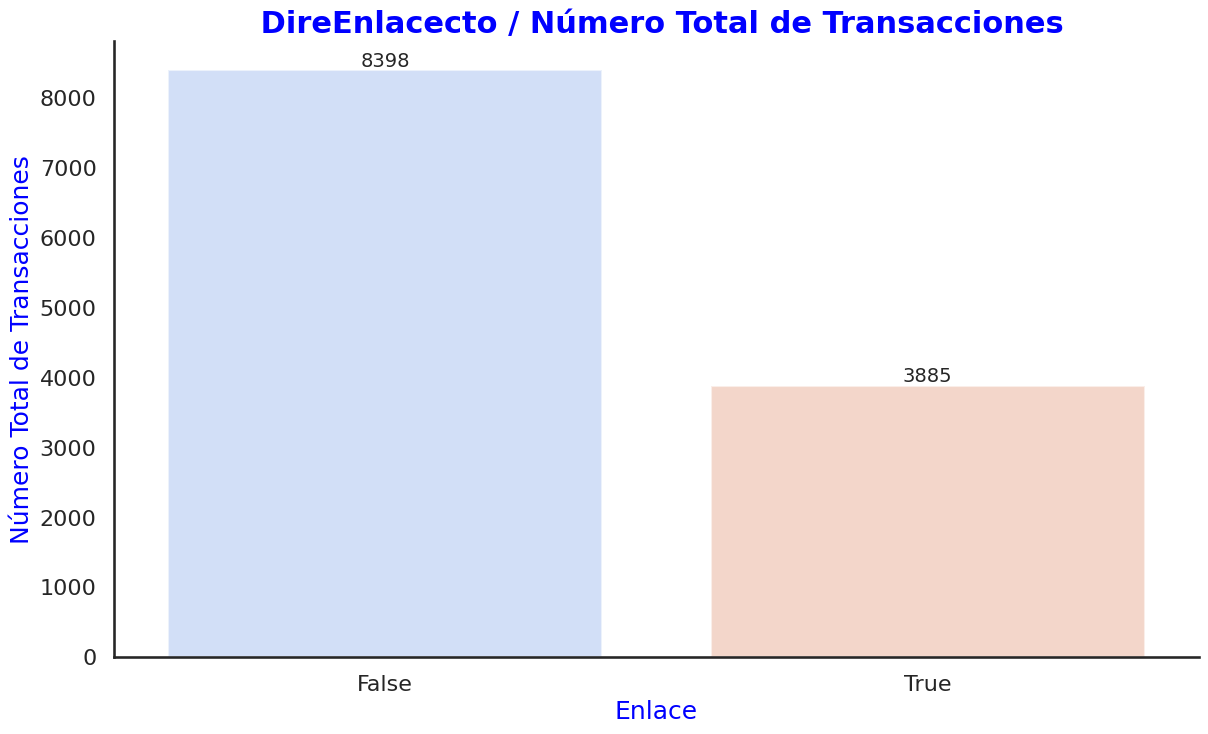

In [ ]:
#Enlace/ Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='isTrueDirect', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title(' DireEnlacecto / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Enlace', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['isTrueDirect'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

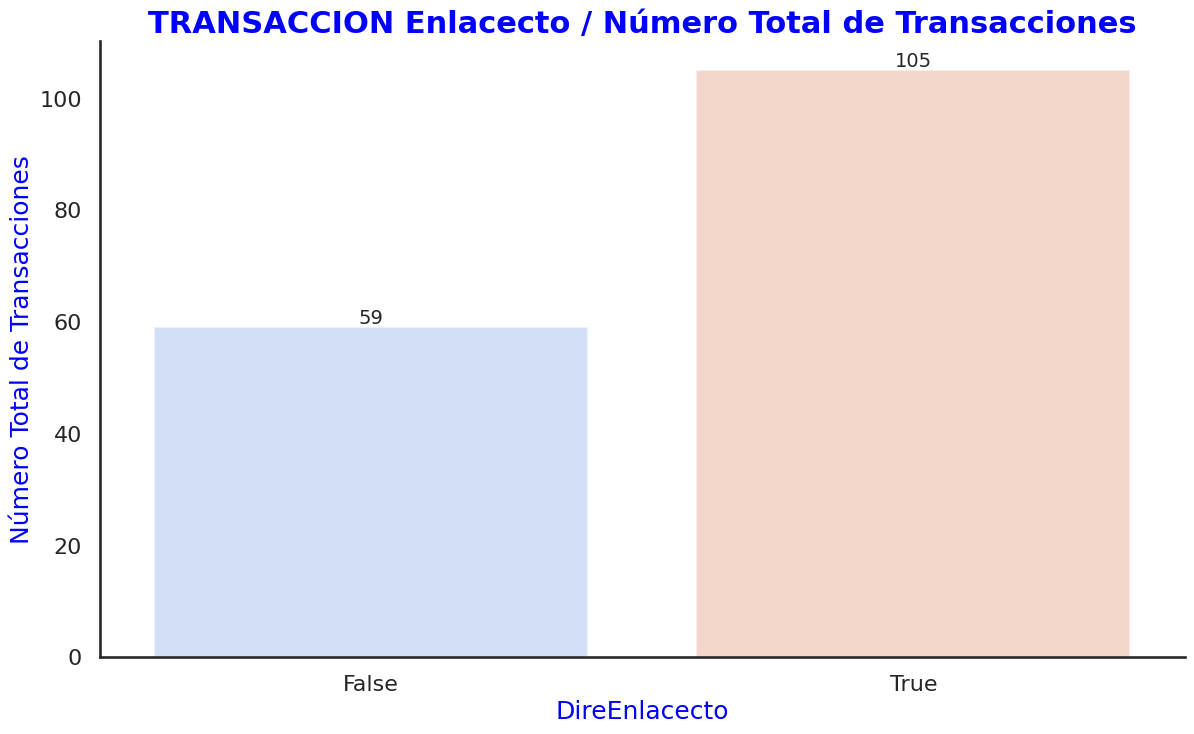

In [ ]:
# DireEnlacecto / Número Total de Transacciones / Consumo
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='isTrueDirect', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('TRANSACCION Enlacecto / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('DireEnlacecto', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos['isTrueDirect'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()


Se decide eliminar las variables no vayan aportar al modelo:referralPath,adwordsClickInfo.page,adwordsClickInfo.slot


In [ ]:
conteo_buscadores = df_consumos.groupby('referralPath')['adwordsClickInfo.page','adwordsClickInfo.slot'].value_counts()
conteo_buscadores

referralPath                                                                        adwordsClickInfo.page  adwordsClickInfo.slot
0                                                                                   No_definido            No_Definido              92
                                                                                    1                      Top                       5
/                                                                                   No_definido            No_Definido              65
/a/google.com/google-merchandise-store/on-site-store                                No_definido            No_Definido               1
/a/google.com/googletopia/discounts-deals-and-free-stuff/alphabet-google-discounts  No_definido            No_Definido               1
dtype: int64

In [ ]:
conteo_buscadores = df_traffic.groupby('referralPath')['adwordsClickInfo.slot','adwordsClickInfo.page'].value_counts()
conteo_buscadores.head(10)

referralPath                                adwordsClickInfo.slot  adwordsClickInfo.page
0                                           No_Definido            No_definido              7528
                                            Top                    1                         258
                                            RHS                    1                           6
                                            Top                    2                           1
/                                           No_Definido            No_definido              1042
/3oIBwdLr5K                                 No_Definido            No_definido                 1
/Client.html                                No_Definido            No_definido                 1
/CudkVdIGqC                                 No_Definido            No_definido                 1
/How-can-one-get-a-Google-T-shirt-in-India  No_Definido            No_definido                 9
/How-do-I-get-a-Google-I-O-t-shirt    

## Ratio de Pageviews a Hits
El ratio de pageviews a hits es una métrica valiosa que puede proporcionar importantes insights sobre la calidad del contenido y la experiencia del usuario en un sitio web. iso

In [ ]:
df_traffic['ratio_pageviews_hits'] = df_traffic['pageviews'] / df_traffic['hits']
df_traffic.sample(5)

,date,channelGrouping,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,...,isTrueDirect_dummy,consumo,hora,dia_semana_nombre,mes,año,dia,horario,recurrencia,ratio_pageviews_hits
4883,2017-05-08,Direct,3634514012661724932,1,2017-05-08 12:22:55,Chrome,Chrome OS,0,desktop,Americas,...,1,0,12,Monday,5,2017,8,06:00-12:00,8,1.0
2806,2016-11-07,Social,96900938428437048,1,2016-11-07 16:14:57,Safari,Macintosh,0,desktop,Europe,...,0,0,16,Monday,11,2016,7,12:00-18:00,1,1.0
996,2016-12-16,Organic Search,9909995827897509513,1,2016-12-16 17:57:13,Chrome,Macintosh,0,desktop,Americas,...,0,0,17,Friday,12,2016,16,12:00-18:00,1,1.0
11866,2016-10-05,Social,3941792375741115478,1,2016-10-05 10:53:16,Opera,Windows,0,desktop,Europe,...,0,0,10,Wednesday,10,2016,5,06:00-12:00,1,1.0
10445,2017-07-18,Direct,8109271413002818915,1,2017-07-18 17:01:40,Chrome,Linux,0,desktop,Americas,...,1,0,17,Tuesday,7,2017,18,12:00-18:00,2,1.0


## interaccion_por_visita:
Esta métrica puede ayudar a entender cuánto interactúa un usuario en promedio por visita, lo que podría ser un indicador de que tal rapido encuentra el producto a comprar

In [ ]:
df_traffic['interaccion_por_visita'] = df_traffic['hits'] / df_traffic['visitNumber']
df_traffic.sample(5)

,date,channelGrouping,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,...,consumo,hora,dia_semana_nombre,mes,año,dia,horario,recurrencia,ratio_pageviews_hits,interaccion_por_visita
8374,2017-05-09,Referral,111407040445914967,2,2017-05-09 17:15:06,Chrome,Macintosh,0,desktop,Americas,...,0,17,Tuesday,5,2017,9,12:00-18:00,1,0.75,4.000000
11241,2016-10-04,Social,3345099283067818097,1,2016-10-04 10:12:36,Safari,Macintosh,0,desktop,Asia,...,0,10,Tuesday,10,2016,4,06:00-12:00,1,1.00,1.000000
5875,2016-11-15,Social,2132554577404185139,1,2016-11-16 02:44:41,Chrome,Windows,0,desktop,Asia,...,0,2,Wednesday,11,2016,16,0:00-06:00,1,1.00,3.000000
1441,2017-02-13,Organic Search,7746458887826479039,19,2017-02-13 22:57:32,Safari,iOS,1,mobile,Americas,...,0,22,Monday,2,2017,13,18:00-24:00,16,1.00,0.052632
12092,2017-04-09,Organic Search,770439819992389431,1,2017-04-10 03:28:47,Chrome,iOS,1,tablet,Asia,...,0,3,Monday,4,2017,10,0:00-06:00,1,1.00,2.000000


In [ ]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    12283 non-null  datetime64[ns]
 1   channelGrouping         12283 non-null  object        
 2   fullVisitorId           12283 non-null  object        
 3   visitNumber             12283 non-null  int64         
 4   visitStartTime          12283 non-null  datetime64[ns]
 5   browser                 12283 non-null  object        
 6   operatingSystem         12283 non-null  object        
 7   isMobile                12283 non-null  int64         
 8   deviceCategory          12283 non-null  object        
 9   continent               12283 non-null  object        
 10  subContinent            12283 non-null  object        
 11  country                 12283 non-null  object        
 12  region                  12283 non-null  object

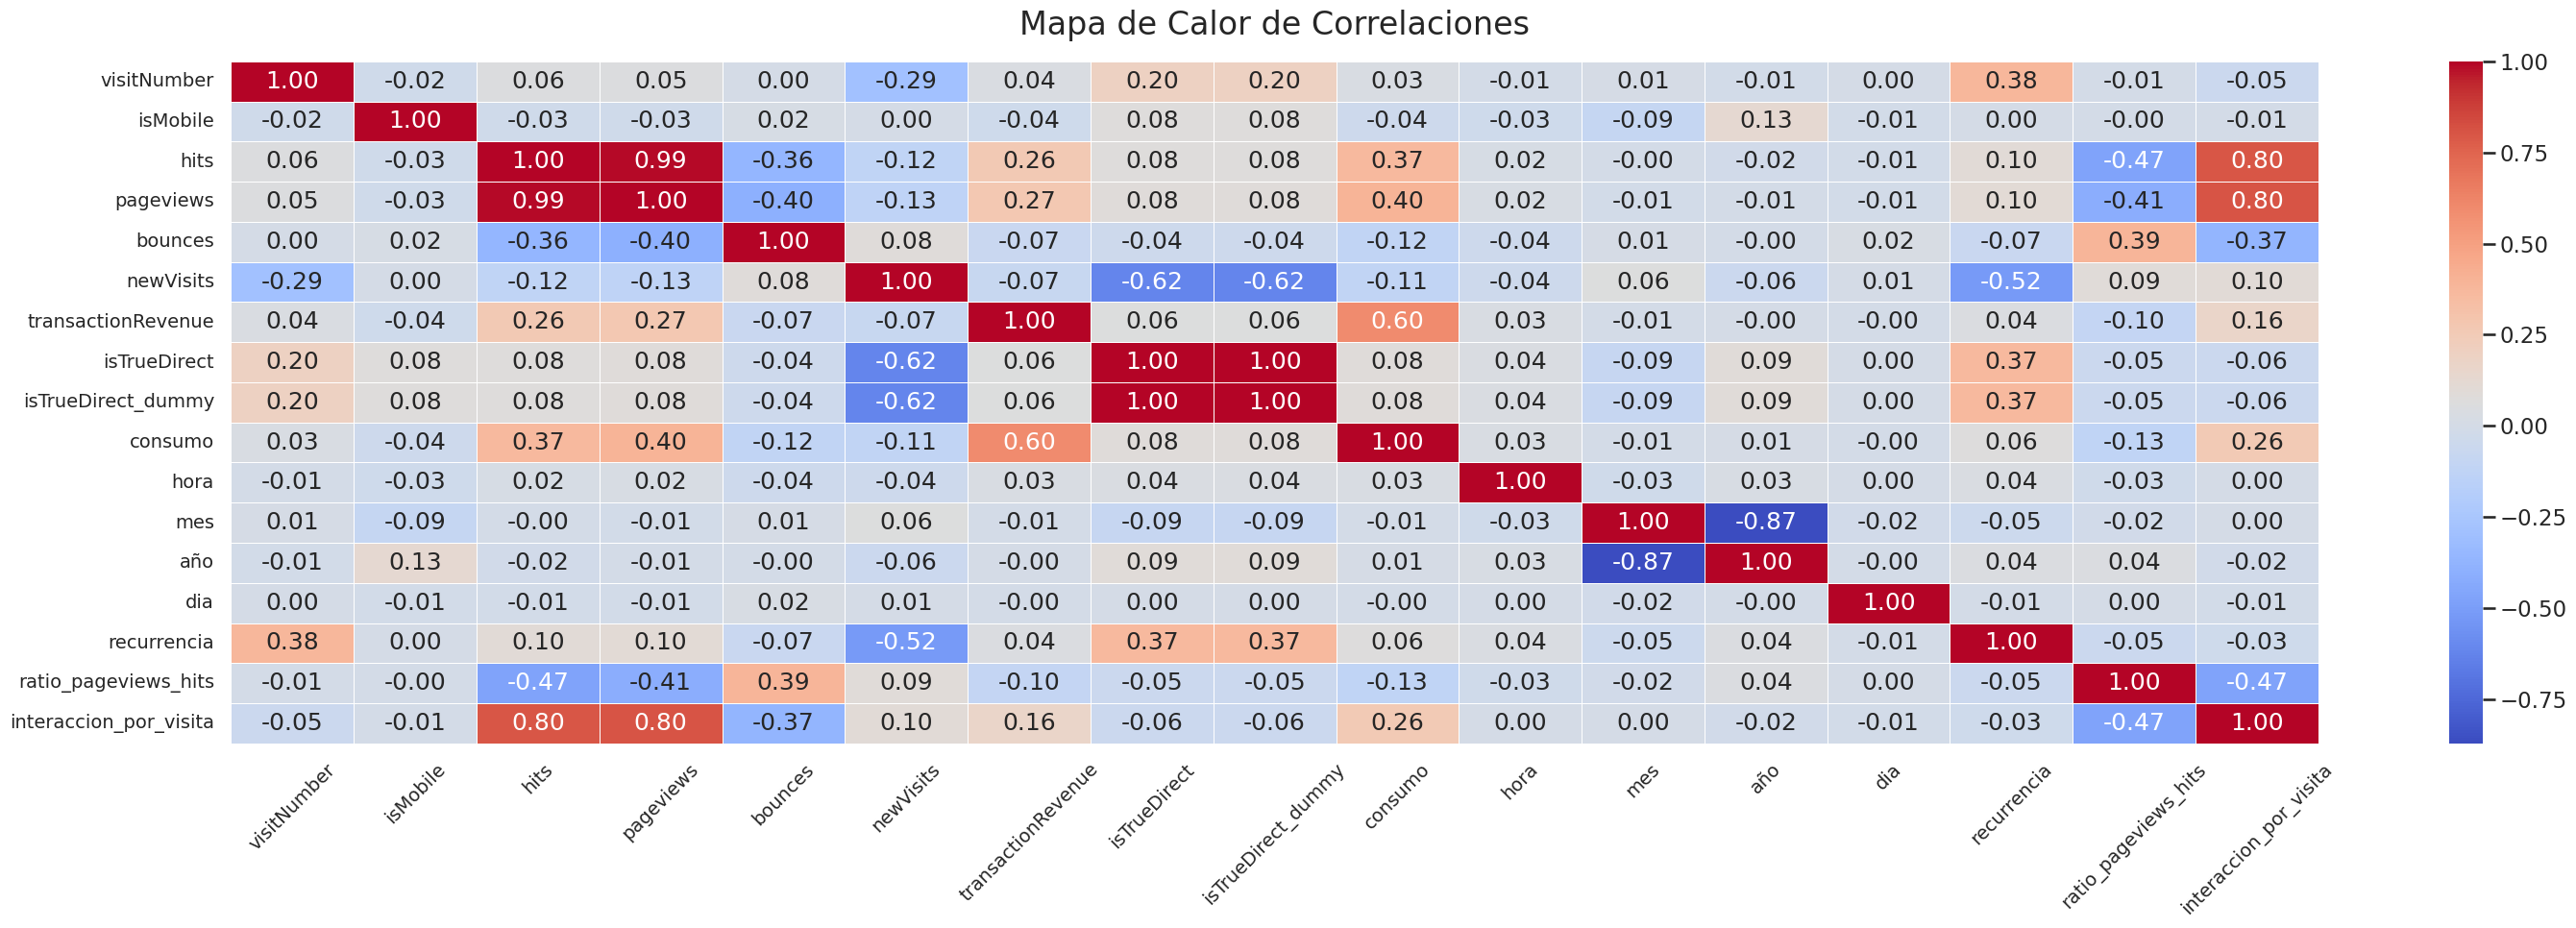

In [ ]:
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(30, 10))
corr_matrix = df_traffic.corr(numeric_only=True)
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white')
heatmap.tick_params(axis='x', which='major', labelsize=14, rotation=45)
heatmap.tick_params(axis='y', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=24, pad=20)
plt.tight_layout()
plt.show()

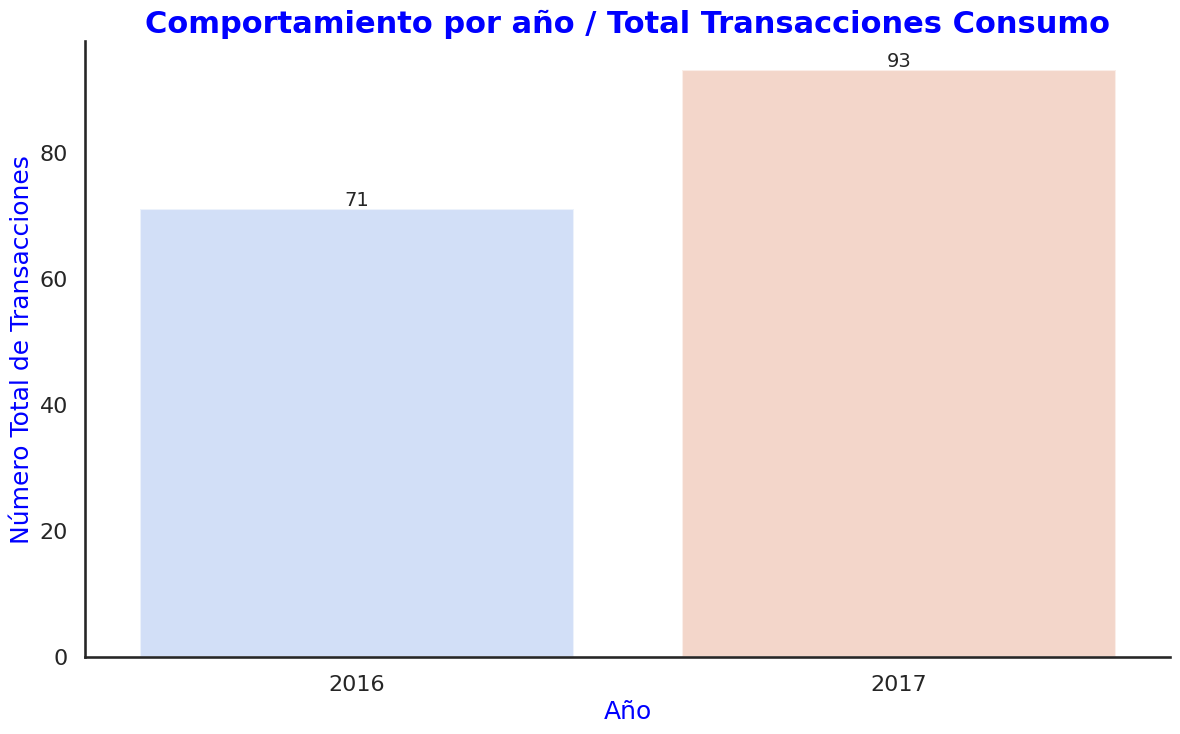

In [ ]:
# Comportamiento por Hora / Número Total de Transacciones CONSUMO

plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='año', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por año / Total Transacciones Consumo', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Año', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos.groupby('hora').size()
for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=14)
plt.show()

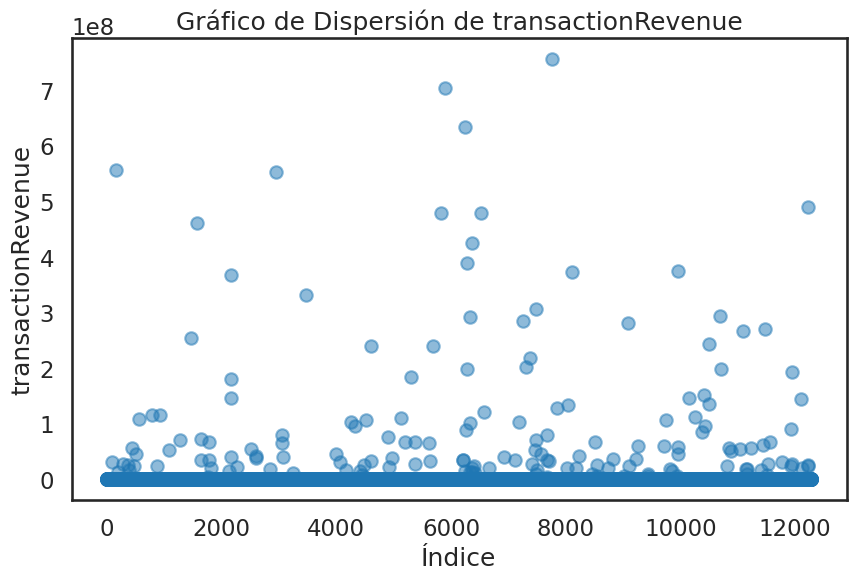

In [ ]:
# Grafico de dispersión (antes)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['fullVisitorId'])), df_traffic['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

<Axes: ylabel='transactionRevenue'>

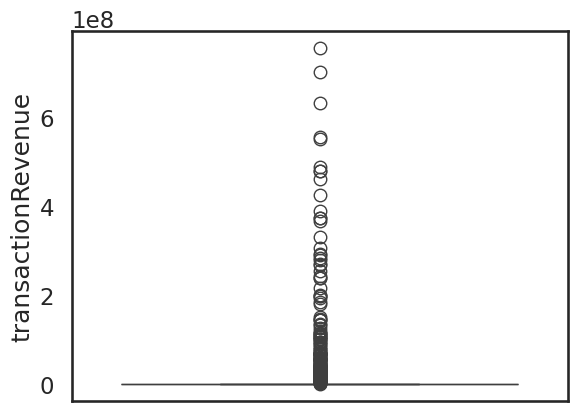

In [ ]:
sns.boxplot(df_traffic.transactionRevenue)